# Will it be an early Spring?

On February 2<sup>nd</sup> every year Punxsutawney Phil makes a prediction about if there will be an early Spring or if Winter will continue for 6 more weeks (till about mid-March). He is however not very accurate (well, according to [The Inner Circle](https://www.groundhog.org/inner-circle) he is 100% correct but the human handler may not interpret his response correctly). The overall goal is to be able to predict if it will be an early Spring.

For this project you must go through most steps in the checklist. You must write responses for all items however sometimes the item will simply be "does not apply". Some of the parts are a bit more nebulous and you simply show that you have done things in general (and the order doesn't really matter). Keep your progress and thoughts organized in this document and use formatting as appropriate (using markdown to add headers and sub-headers for each major part). Do not do the final part (launching the product) and your presentation will be done as information written in this document in a dedicated section, no slides or anything like that. It should however include the best summary plots/graphics/data points.

You are intentionally given very little information thus far. You must communicate with your client (me) for additional information as necessary. But also make sure that your communications are efficient, thought out, and not redundant as your client might get frustrated and "fire" you (this only applies to getting information from your client, this does not necessary apply to asking for help with the actual project itself - you should continuously ask questions for getting help).

You must submit all data files and a pickled final model along with this notebook.

The group with the best results on the 10% of the data that I kept for myself will earn +5 extra credit (if multiple groups are close points may be given to multiple groups).

In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler, MinMaxScaler

from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.svm import OneClassSVM

from sklearn.metrics import accuracy_score, f1_score 

Frame the Problem and Look at the Big Picture
========================

1. **Define the objective in business terms.** <mark>The objective is to predict whether there will be an early Spring, allowing farmers to decide whether to purchase a new kind of corn seed that can grow two crops. Early Spring is defined as a period when the average temperature is above 40°F, the minimum temperature is above 32°F, and the average soil temperature is above 50°F before April 1st, with no snow on the ground.</mark>
2. **How will your solution be used?** <mark>The solution will be used by farmers in western PA to make informed decisions about purchasing seeds by February 25th. The prediction will help them determine if conditions will be favorable for planting the new corn seed early.</mark>
3. **What are the current solutions/workarounds (if any)?** <mark>Currently, farmers rely on Punxsutawney Phil's prediction, which is not very accurate. They may also use historical weather data and personal experience to make decisions.</mark>
4. **How should you frame this problem (supervised/unsupervised, online/offline, …)?** <mark>This problem should be framed as a supervised learning problem, where the goal is to predict a binary outcome (early Spring or not) based on historical weather and soil data. This will be a classification model, using offline learning since the most important data involves winter and spring only.</mark>
5. **How should performance be measured? Is the performance measure aligned with the business objective?** <mark>Performance should be measured using accuracy, precision, recall, and F1-score. Since the preference is to avoid false negatives (missing an early Spring), recall might be particularly important.</mark>
6. **What would be the minimum performance needed to reach the business objective?** <mark>The minimum performance needed would be a recall rate that ensures farmers can confidently make purchasing decisions with minimal risk of missing an early Spring.</mark>
7. **What are comparable problems? Can you reuse experience or tools?** <mark>We can use tools from the MNIST in-class notebook to help with this model, especially with working with binary classifiers and a classification model. </mark>
8. **Is human expertise available?** <mark>Yes, human expertise is available from the farmers who have historical data and experience with weather patterns and planting conditions.</mark>
9. **How would you solve the problem manually?** <mark>I would solve this manually by focusing on the weather conditions, soil conditions, temperature of both weather and soil, whether or not there is snow cosverage within the land in Western PA. </mark>
10. **List the assumptions you (or others) have made so far. Verify assumptions if possible.** <mark>TODO</mark>

Get the Data
=======================================================================

1. **List the data you need and how much you need.** <mark>We need data to predict either an early spring, or late winter. To do that we need weather, soil, and a dataset which gives us a label feature like early spring. Also could use El Nino or La Nina data to predict this.</mark>
2. **Find and document where you can get that data:** <mark>From the client for first 3 datasets. From https://www.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php for El Nino and La Nina data</mark>
3. **Get access authorizations:** <mark>Done</mark>
4. **Create a workspace (with enough storage space)**: This notebook.
5. **Get the data:** <mark>Got the data.</mark>
6. **Convert the data to a format you can easily manipulate (without changing the data itself):** Done, it's a CSV.
7. **Ensure sensitive information is deleted or protected (e.g. anonymized):** Done.
8. **Check the size and type of data (time series, geographical, …):** <mark>TODO</mark> - complete in the cells below
9. **Sample a test set, put it aside, and never look at it (no data snooping!):** <mark>TODO</mark> - complete in the cells below

In [2]:
def load_data(weather_filename="weather.csv", soil_filename="soil.csv", phil_pred_filename="phil_pred.csv", early_spring_filename="early_spring.csv"):
    """
    Load all the data and join it together. The data will be pivoted so that the year is the row index.
    The years will be the same as the years in the data file.

    Notes:
      - You MUST provide this function
      - This function must have the same parameters
      - This function must return a dataframe with the years as the row index and only include the
        years that are in the data file provided
      - You can change the contents of this function, but will likely want to keep the parts I have
        provided
      - This function must do nothing BESIDES loading the data, pivoting, joining it, and selecting
        the proper year rows (no imputation, scaling, etc.)
    """

    # Load the basic data
    weather = pd.read_csv(weather_filename, parse_dates=[0], na_values=['M'], converters={
        "precipitation": convert_precipitation,
        "snowfall": convert_precipitation,
        "snowdepth": convert_depth
    })
    soil = pd.read_csv(soil_filename, parse_dates=[0])
    phil_pred = pd.read_csv(phil_pred_filename)
    early_spring = pd.read_csv(early_spring_filename)

    # Pivot and join basic data
    basic_data = (
        pivot(weather, 'date')
        .join(pivot(soil, 'day'))
        .join(phil_pred.set_index('year'))
        .join(early_spring.set_index('year'))
    )

    # Load additional data
    oni_data = pd.read_csv("ExtraDataONI.csv")
    oni_data = oni_data.set_index('year')

    # Join the basic data with the additional data
    data = basic_data.join(oni_data, how='inner')

    # Ensure years are the same
    years = basic_data.index  # the years in the basic data
    return data.loc[years]



def pivot(data, date_col, pivot_value='day_of_year'):
    """
    Pivot the data using the given date column. By default the pivot value is the day of the year
    but this can be changed to other values, such as the month or the week of the year.

    The returned data will have the year as the row index and a flattened column index.
    """
    data['year'] = data[date_col].dt.year
    data[pivot_value] = getattr(data[date_col].dt, pivot_value)
    data = data.drop(columns=[date_col]).pivot(index=['year'], columns=[pivot_value])
    data.columns = ["_".join(str(x) for x in a) for a in data.columns.to_flat_index()]  # from https://stackoverflow.com/questions/14507794/pandas-how-to-flatten-a-hierarchical-index-in-columns
    return data


def convert_precipitation(raw):
        return 0.0025 if raw == 'T' else np.nan if raw == 'M' else pd.to_numeric(raw)
def convert_depth(raw):
        return 0.025 if raw == 'T' else np.nan if raw == 'M' else pd.to_numeric(raw)


class ImputerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.fillna(X.mean())

class WeeklyFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, feature_prefixes):
        """
        Initialize the transformer with the prefixes of the features to sum.

        Parameters:
        feature_prefixes : list
            List of prefixes for features to be aggregated (e.g., ['snowdepth', 'precipitation']).
        """
        self.feature_prefixes = feature_prefixes
        
    def fit(self, X, y=None):
        """Fit method, no fitting necessary."""
        return self

    def transform(self, X):
        """
        Transform the input DataFrame by summing every 7 days for specified features.

        Parameters:
        X : DataFrame
            The input DataFrame containing the features to transform.

        Returns:
        DataFrame
            Transformed DataFrame with weekly features and original features dropped.
        """
        X = X.copy()  # Work on a copy of the DataFrame to avoid modifying the original
        
        for prefix in self.feature_prefixes:
            # Select columns that match the prefix
            columns_to_sum = [col for col in X.columns if col.startswith(prefix)]
            if not columns_to_sum:
                continue
            
            # Check if there are enough columns to sum
            if len(columns_to_sum) < 7:
                raise ValueError(f"Not enough columns to sum for prefix '{prefix}'")
            
            # Sum every 7 columns and create new weekly features
            num_weeks = len(columns_to_sum) // 7
            for week in range(num_weeks):
                week_sum = X[columns_to_sum[week * 7:(week + 1) * 7]].sum(axis=1)
                X[f'{prefix}_week_{week + 1}'] = week_sum
            
            # Drop original columns
            X.drop(columns=columns_to_sum, inplace=True)
        
        return X

class WeeklyDeltaTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, feature_prefixes=None):
        """
        Initialize the transformer with a list of feature prefixes.
        
        Parameters:
        - feature_prefixes: List of prefixes for the weekly features to calculate deltas.
        """
        if feature_prefixes is None:
            feature_prefixes = []
        self.feature_prefixes = feature_prefixes

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Create a DataFrame to hold the delta results
        delta_results = pd.DataFrame()

        for prefix in self.feature_prefixes:
            # Select columns based on the provided prefix
            cols = [col for col in X.columns if col.startswith(prefix)]

            # Calculate the delta for the selected columns
            deltas = X[cols].diff(axis=1).iloc[:, 1:]  # Skip the first week (no previous week to compare)

            # Rename columns to indicate they are deltas
            deltas.columns = [f'{prefix}delta_week_{i}' for i in range(1, len(deltas.columns) + 1)]

            # Concatenate deltas to the results DataFrame
            delta_results = pd.concat([delta_results, deltas], axis=1)

        # Drop the original weekly columns
        X_transformed = X.drop(columns=[col for prefix in self.feature_prefixes for col in X.columns if col.startswith(prefix)])

        # Combine the delta results with the original DataFrame
        X_transformed = pd.concat([X_transformed, delta_results], axis=1)

        return X_transformed

In [3]:
# read csv file

data = load_data(weather_filename="weather.csv", soil_filename="soil.csv", phil_pred_filename="phil_pred.csv", early_spring_filename="early_spring.csv")

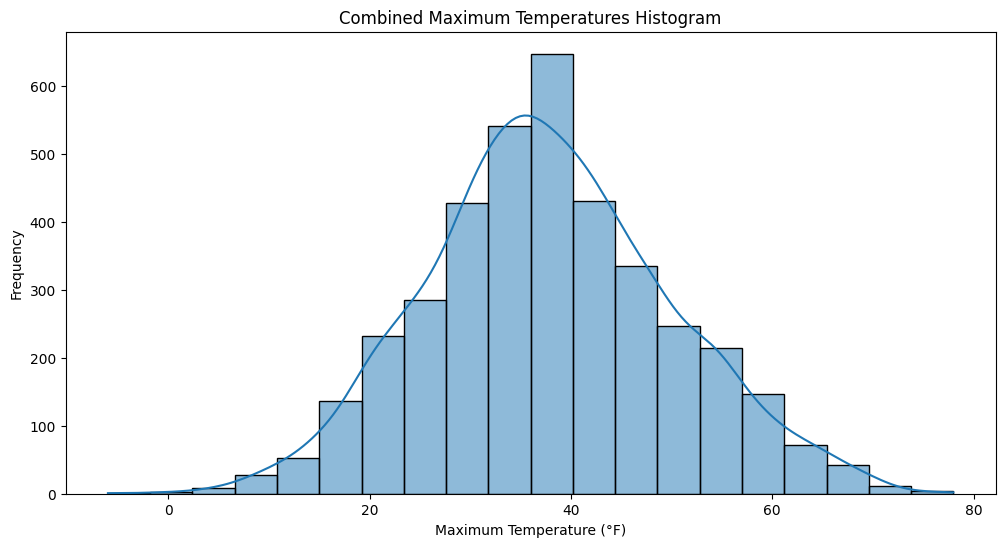

In [4]:
max_temp_values = pd.melt(data, value_vars=[col for col in data if 'max_temp' in col], 
                           var_name='Temperature_Type', value_name='Max_Temperature')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(max_temp_values['Max_Temperature'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Maximum Temperatures Histogram')
plt.xlabel('Maximum Temperature (°F)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

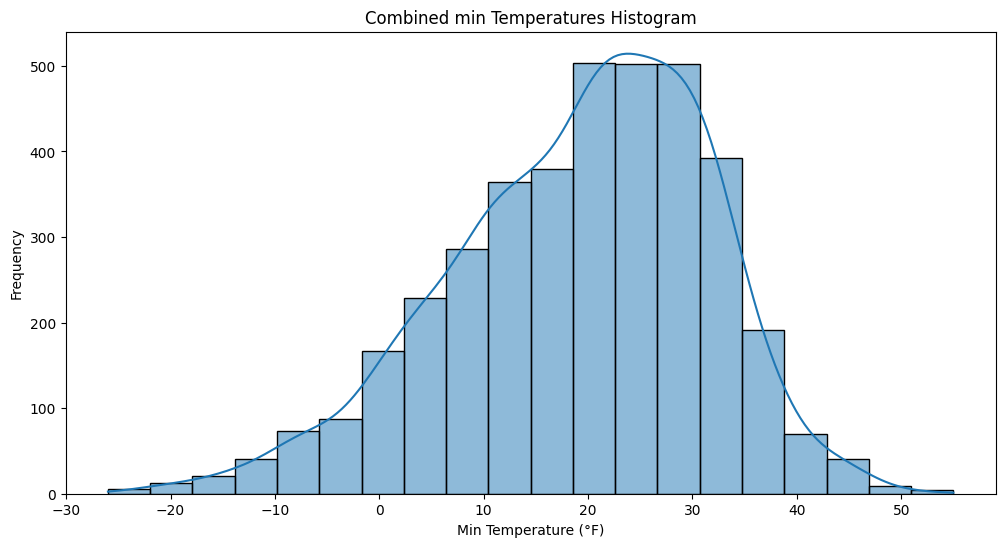

In [5]:
min_temp_values = pd.melt(data, value_vars=[col for col in data if 'min_temp' in col], 
                           var_name='Temperature_Type', value_name='Min_Temperature')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(min_temp_values['Min_Temperature'], bins=20, kde=True)

# Add labels and title
plt.title('Combined min Temperatures Histogram')
plt.xlabel('Min Temperature (°F)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

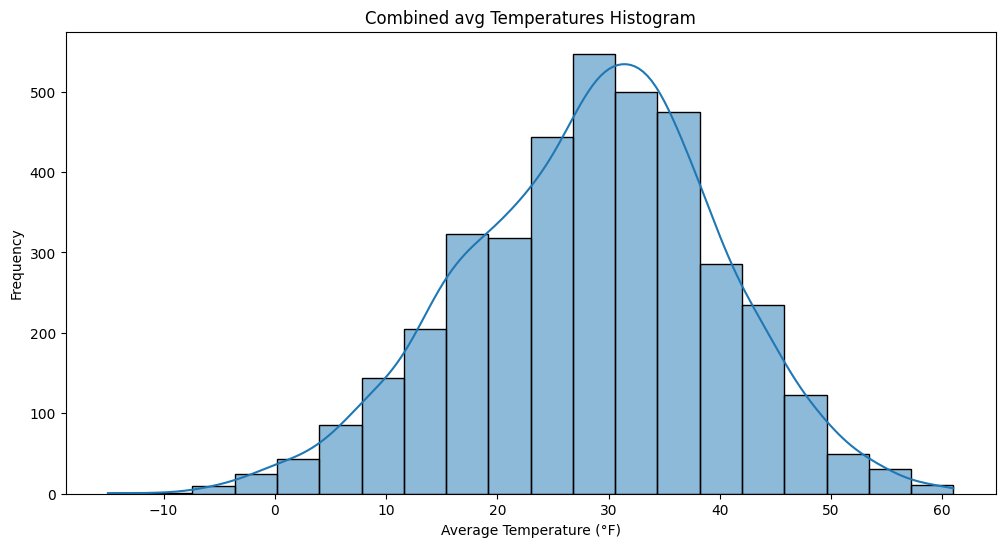

In [6]:
avg_temp_values = pd.melt(data, value_vars=[col for col in data if 'avg_temp' in col], 
                           var_name='Temperature_Type', value_name='Avg_Temperature')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(avg_temp_values['Avg_Temperature'], bins=20, kde=True)

# Add labels and title
plt.title('Combined avg Temperatures Histogram')
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

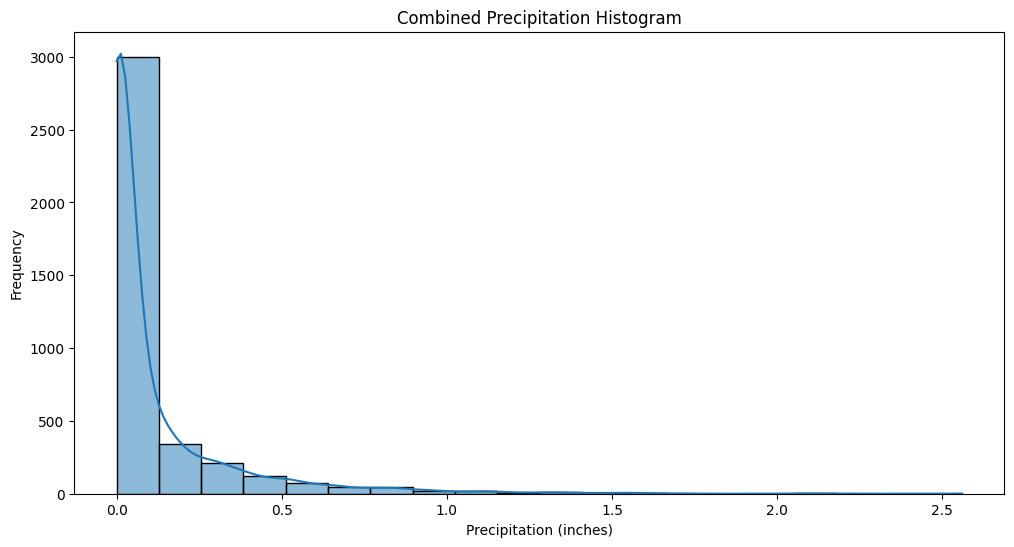

In [7]:
precipitation_values = pd.melt(data, value_vars=[col for col in data if 'precipitation' in col],
                                 var_name='Precipitation_Type', value_name='Precipitation')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(precipitation_values['Precipitation'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Precipitation Histogram')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

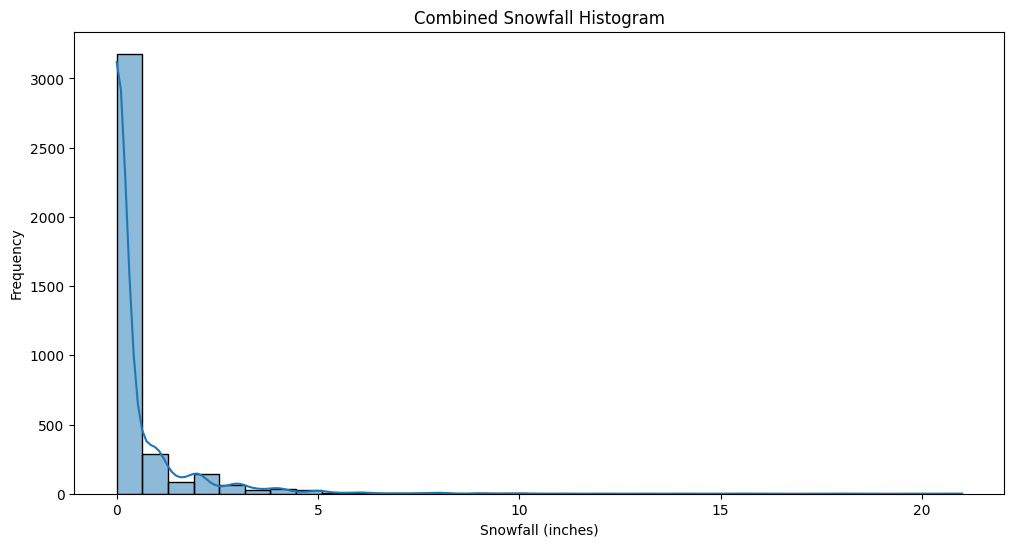

In [8]:
snowfall_values = pd.melt(data, value_vars=[col for col in data if 'snowfall' in col],
                                    var_name='Snowfall_Type', value_name='Snowfall')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(snowfall_values['Snowfall'], bins=33, kde=True)

# Add labels and title
plt.title('Combined Snowfall Histogram')
plt.xlabel('Snowfall (inches)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

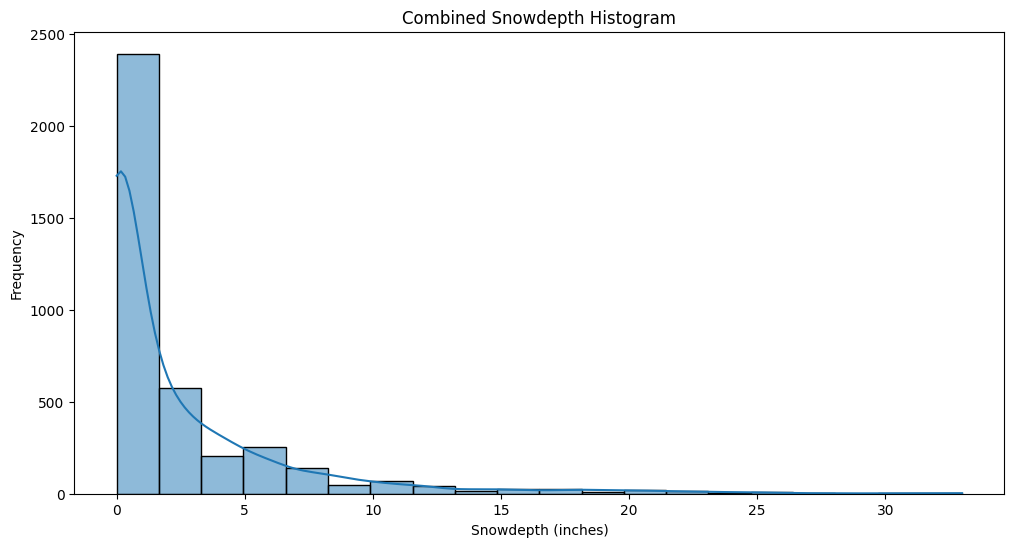

In [9]:
snowdepth_values = pd.melt(data, value_vars=[col for col in data if 'snowdepth' in col],
                                    var_name='Snowdepth_Type', value_name='Snowdepth')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(snowdepth_values['Snowdepth'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Snowdepth Histogram')
plt.xlabel('Snowdepth (inches)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

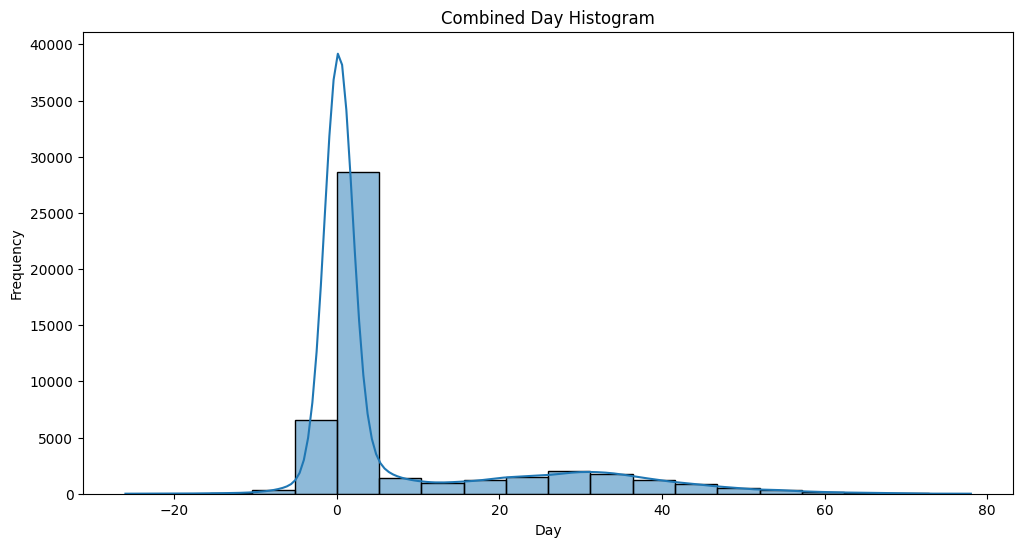

In [10]:
day_values = pd.melt(data, value_vars=[col for col in data if 'day' in col],
                                    var_name='Day_Type', value_name='Day')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(day_values['Day'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Day Histogram')
plt.xlabel('Day')
plt.ylabel('Frequency')

# Show the plot
plt.show()

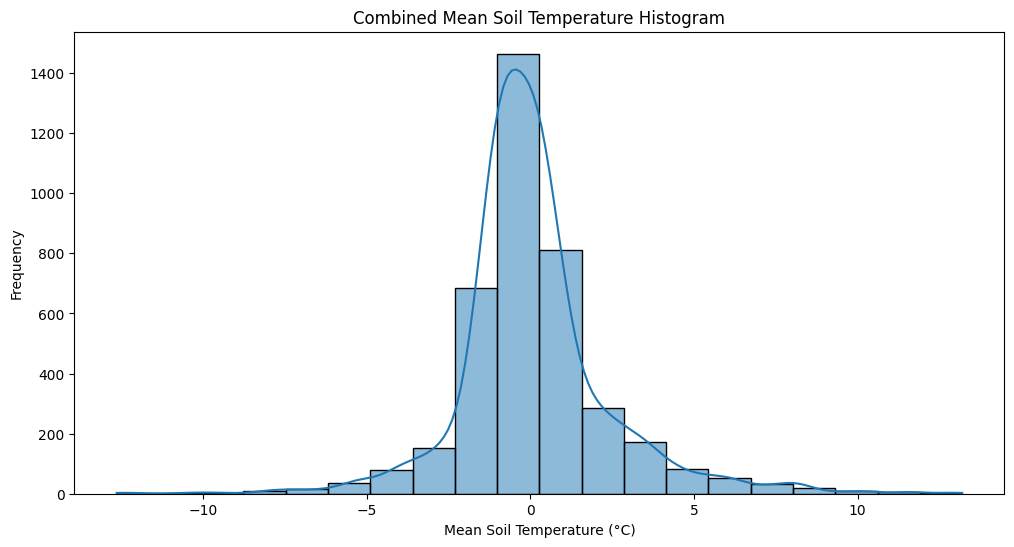

In [11]:
mean_soil_temp_values = pd.melt(data, value_vars=[col for col in data if 'mean_soil_temp' in col],
                                    var_name='Mean_Soil_Temperature_Type', value_name='Mean_Soil_Temperature')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(mean_soil_temp_values['Mean_Soil_Temperature'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Mean Soil Temperature Histogram')
plt.xlabel('Mean Soil Temperature (°C)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

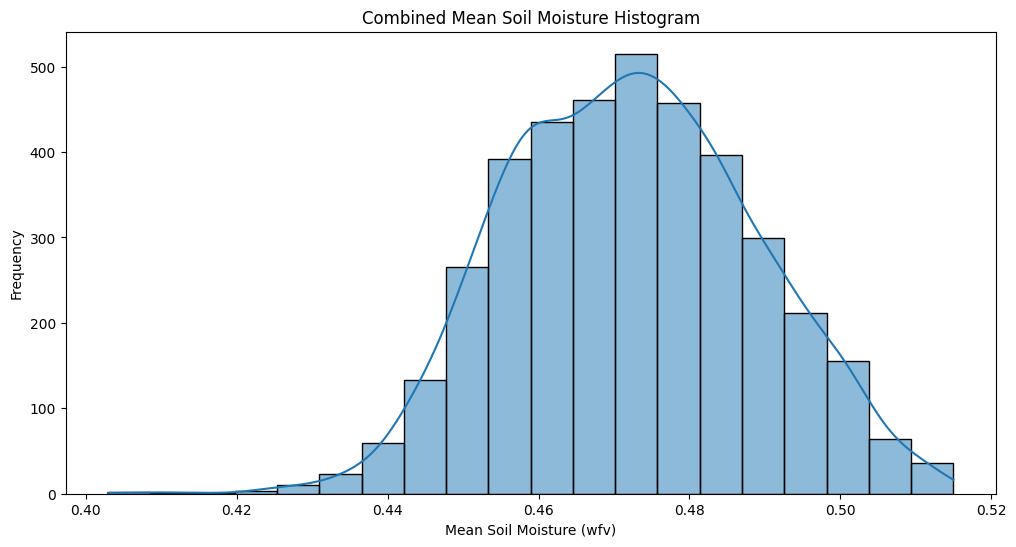

In [12]:
mean_soil_moisture_values = pd.melt(data, value_vars=[col for col in data if 'mean_soil_moisture' in col],
                                    var_name='Mean_Soil_Moisture_Type', value_name='Mean_Soil_Moisture')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(mean_soil_moisture_values['Mean_Soil_Moisture'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Mean Soil Moisture Histogram')
plt.xlabel('Mean Soil Moisture (wfv)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

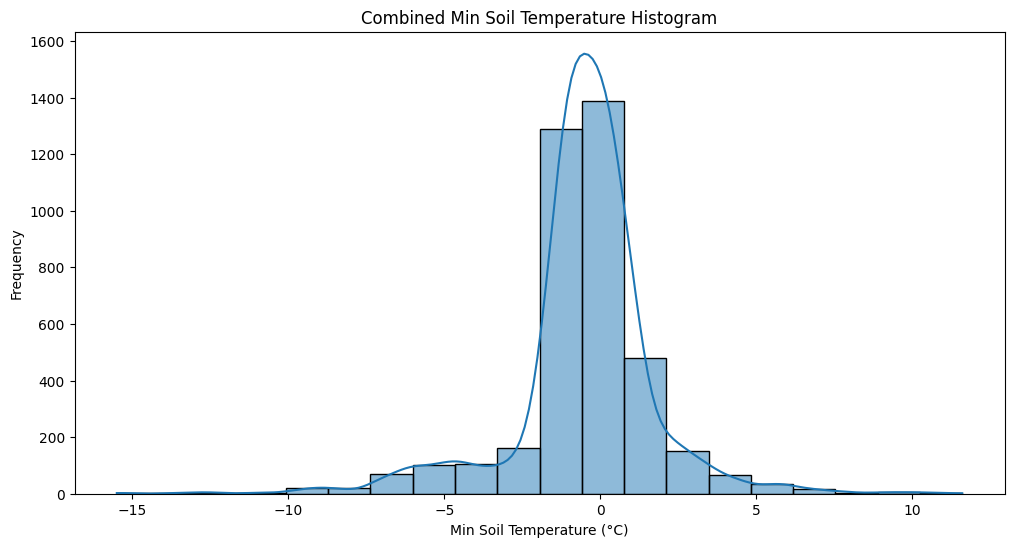

In [13]:
min_soil_temp_values = pd.melt(data, value_vars=[col for col in data if 'min_soil_temp' in col],
                                    var_name='Min_Soil_Temperature_Type', value_name='Min_Soil_Temperature')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(min_soil_temp_values['Min_Soil_Temperature'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Min Soil Temperature Histogram')
plt.xlabel('Min Soil Temperature (°C)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

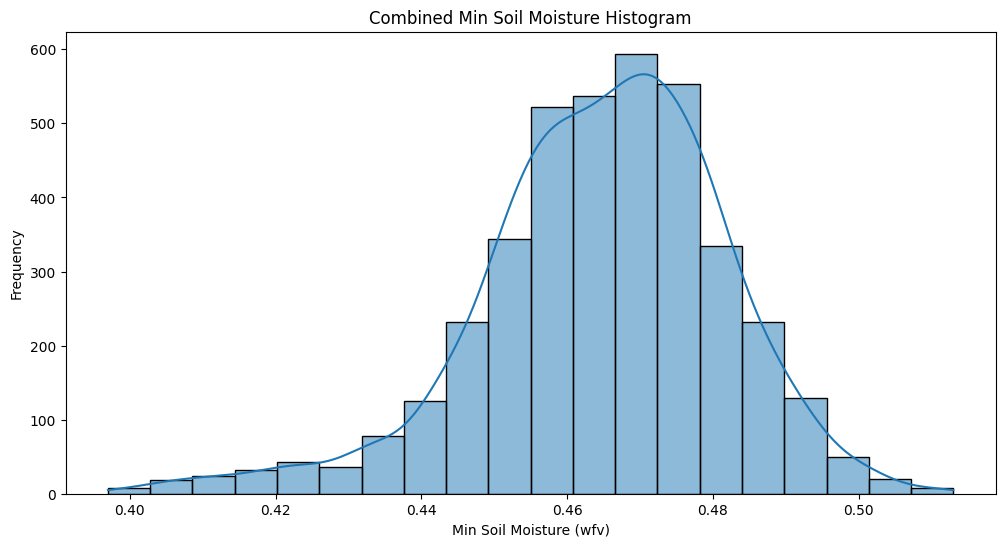

In [14]:
min_soil_moisture_values = pd.melt(data, value_vars=[col for col in data if 'min_soil_moisture' in col],
                                    var_name='Min_Soil_Moisture_Type', value_name='Min_Soil_Moisture')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(min_soil_moisture_values['Min_Soil_Moisture'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Min Soil Moisture Histogram')
plt.xlabel('Min Soil Moisture (wfv)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


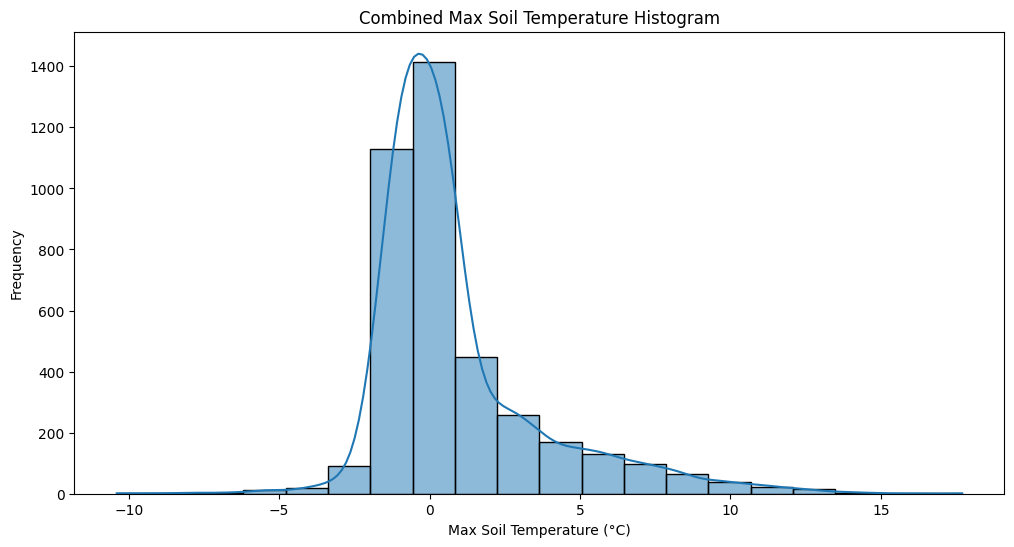

In [15]:
max_soil_temp_values = pd.melt(data, value_vars=[col for col in data if 'max_soil_temp' in col],
                                    var_name='Max_Soil_Temperature_Type', value_name='Max_Soil_Temperature')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(max_soil_temp_values['Max_Soil_Temperature'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Max Soil Temperature Histogram')
plt.xlabel('Max Soil Temperature (°C)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


### Splitting Data

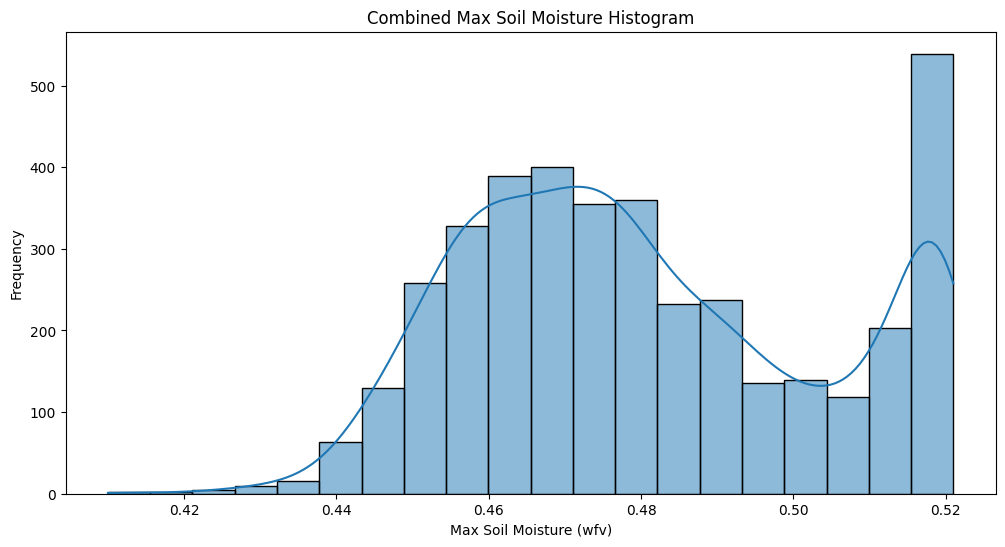

In [16]:
max_soil_moisture_values = pd.melt(data, value_vars=[col for col in data if 'max_soil_moisture' in col],
                                    var_name='Max_Soil_Moisture_Type', value_name='Max_Soil_Moisture')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(max_soil_moisture_values['Max_Soil_Moisture'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Max Soil Moisture Histogram')
plt.xlabel('Max Soil Moisture (wfv)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

<Axes: xlabel='DJF', ylabel='Count'>

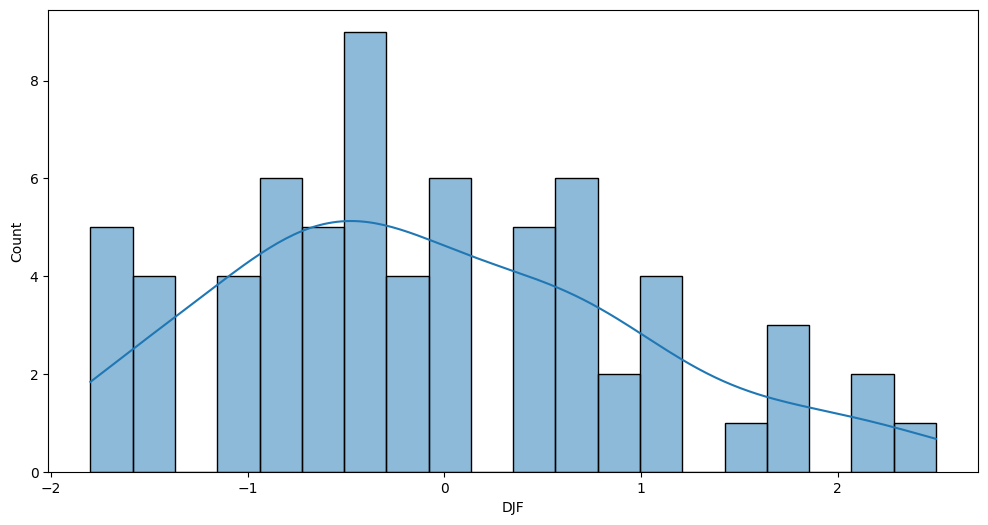

In [17]:
#plot DJF variable in data

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['DJF'], bins=20, kde=True)

<Axes: xlabel='JFM', ylabel='Count'>

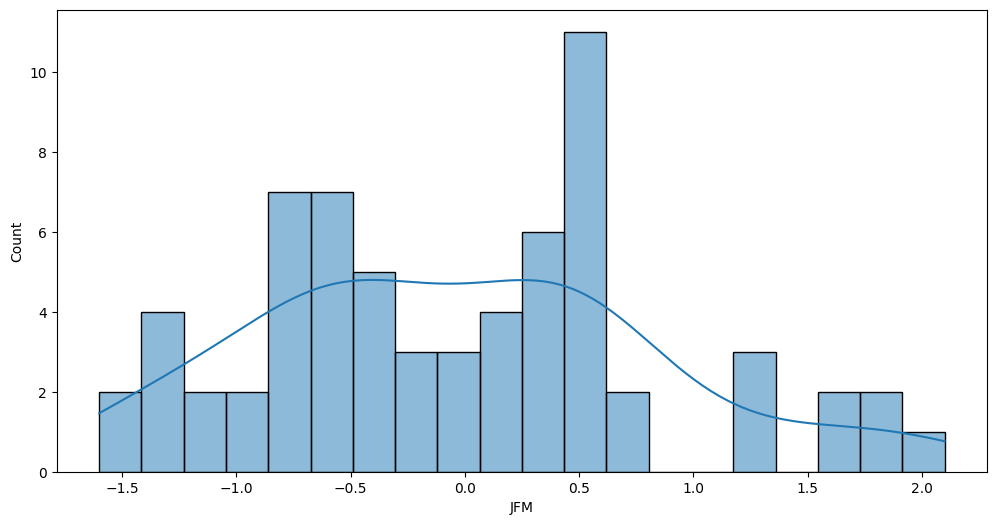

In [18]:
#plot JFM
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['JFM'], bins=20, kde=True)

<Axes: xlabel='FMA', ylabel='Count'>

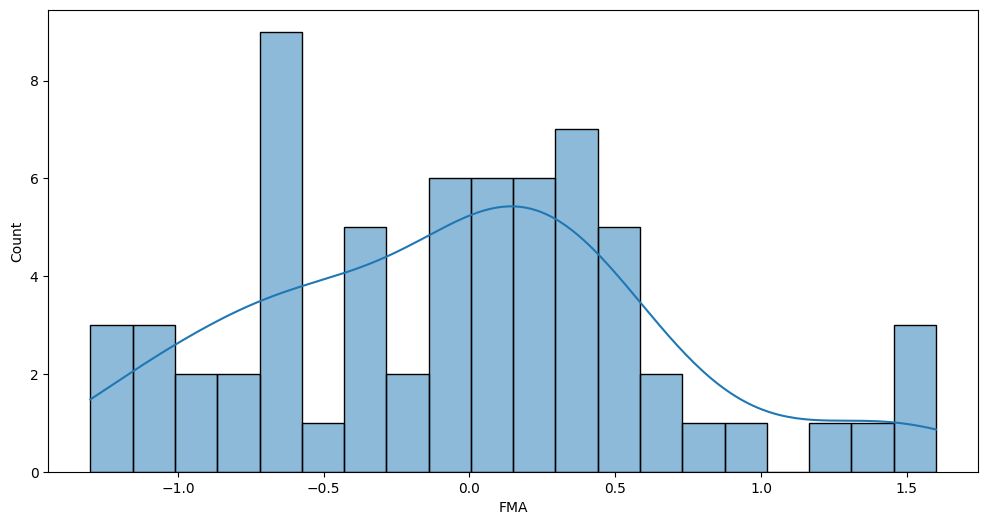

In [19]:
#plot FMA

plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['FMA'], bins=20, kde=True)

<Axes: xlabel='MAM', ylabel='Count'>

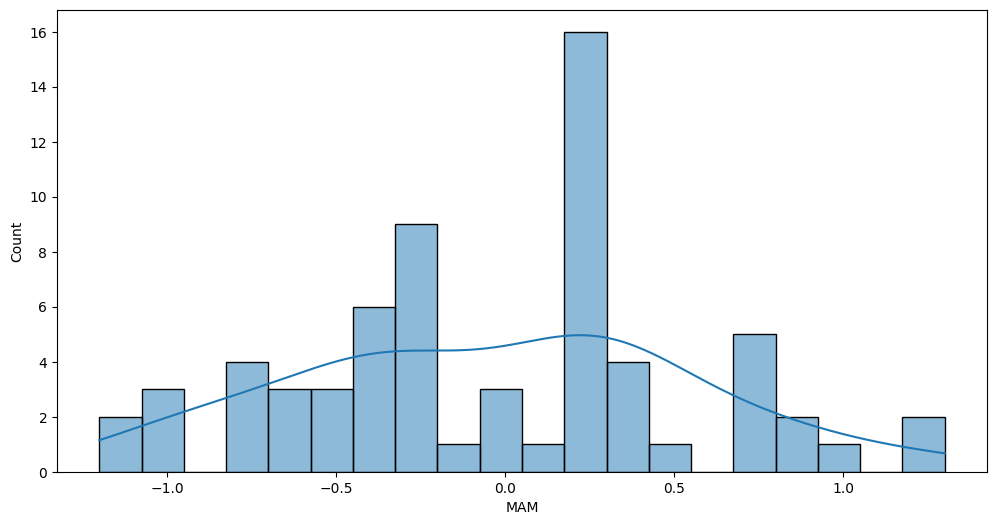

In [20]:
#plot MAM

plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['MAM'], bins=20, kde=True)

<Axes: xlabel='AMJ', ylabel='Count'>

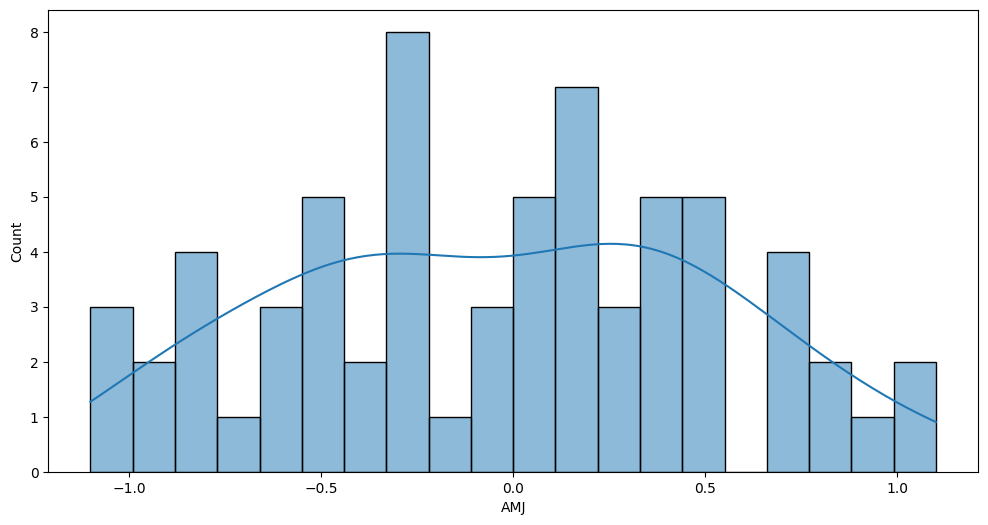

In [21]:
#plot AMJ

plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['AMJ'], bins=20, kde=True)

<Axes: xlabel='MJJ', ylabel='Count'>

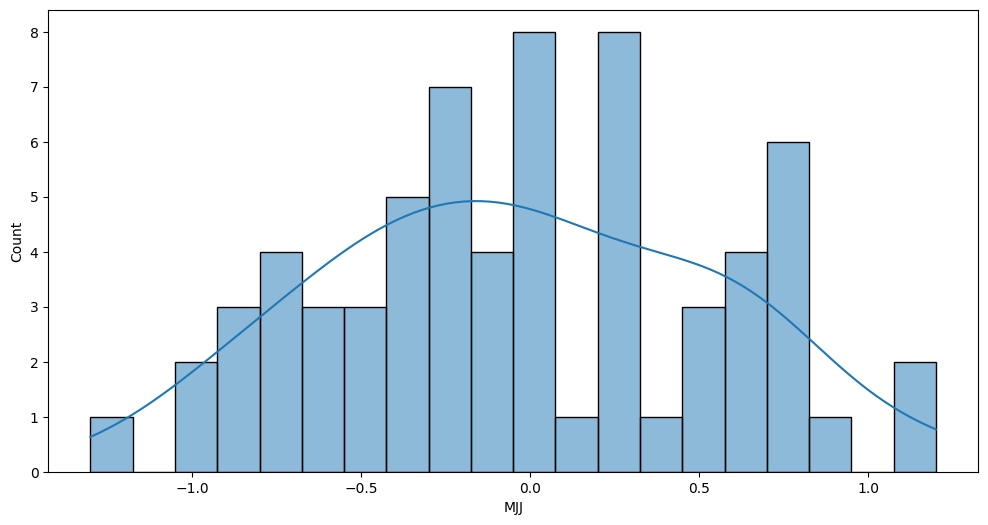

In [22]:
#plot MJJ

plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['MJJ'], bins=20, kde=True)

<Axes: xlabel='JJA', ylabel='Count'>

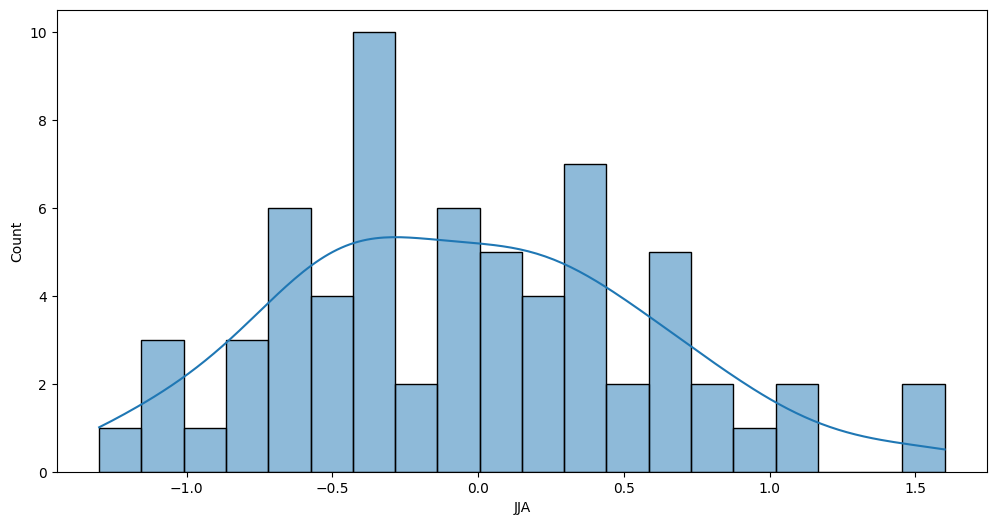

In [23]:
#plot JJA

plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['JJA'], bins=20, kde=True)

<Axes: xlabel='JAS', ylabel='Count'>

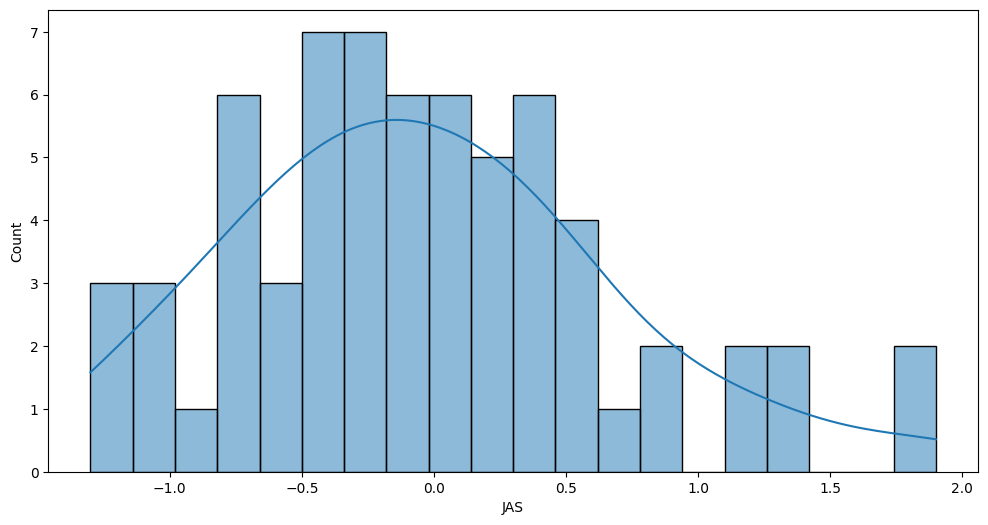

In [24]:
#plot JAS

plt.figure(figsize=(12, 6))

# Create the histogram

sns.histplot(data['JAS'], bins=20, kde=True)

<Axes: xlabel='ASO', ylabel='Count'>

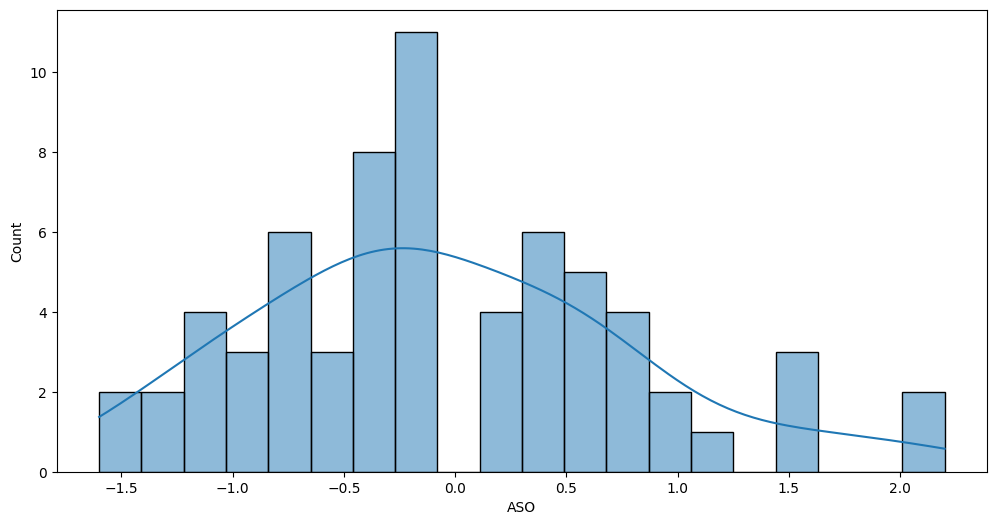

In [25]:
#plot ASO

plt.figure(figsize=(12, 6))

# Create the histogram

sns.histplot(data['ASO'], bins=20, kde=True)

<Axes: xlabel='SON', ylabel='Count'>

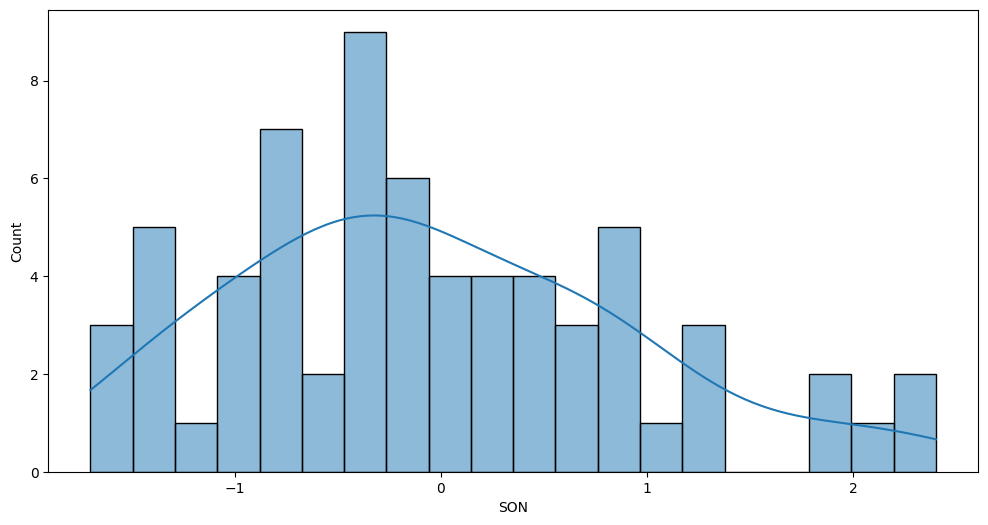

In [26]:
#plot SON

plt.figure(figsize=(12, 6))

# Create the histogram

sns.histplot(data['SON'], bins=20, kde=True)

<Axes: xlabel='OND', ylabel='Count'>

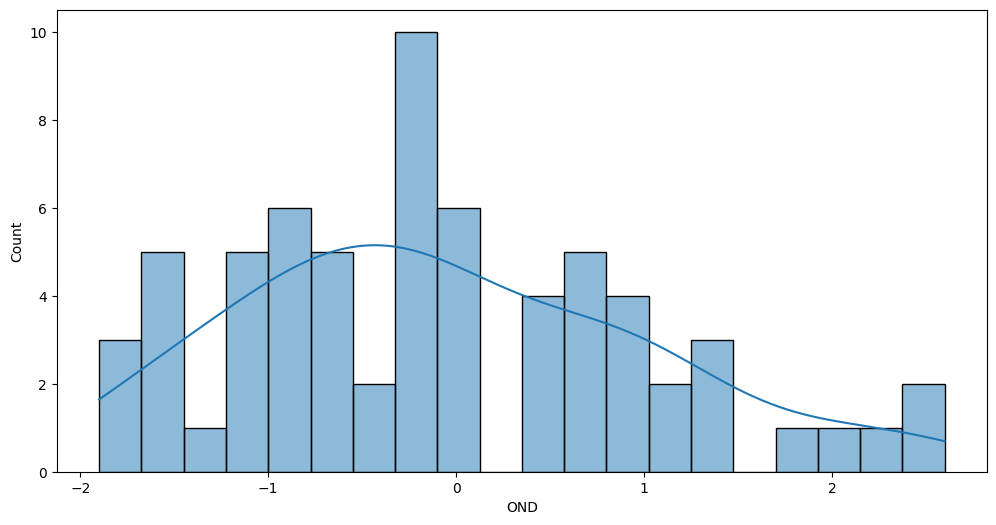

In [27]:
#plot OND

plt.figure(figsize=(12, 6))

# Create the histogram

sns.histplot(data['OND'], bins=20, kde=True)

<Axes: xlabel='NDJ', ylabel='Count'>

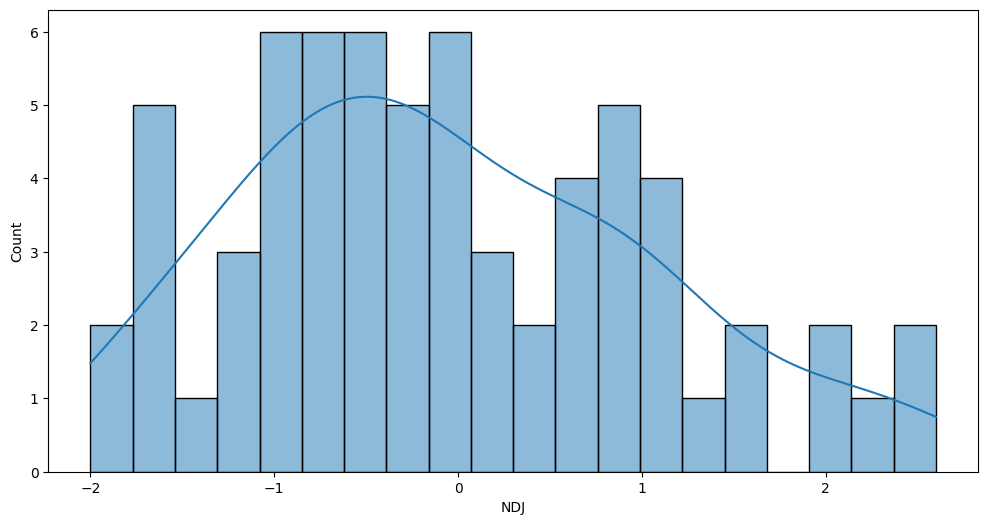

In [28]:
#plot NDJ

plt.figure(figsize=(12, 6))

# Create the histogram

sns.histplot(data['NDJ'], bins=20, kde=True)

<Axes: xlabel='early_spring', ylabel='Count'>

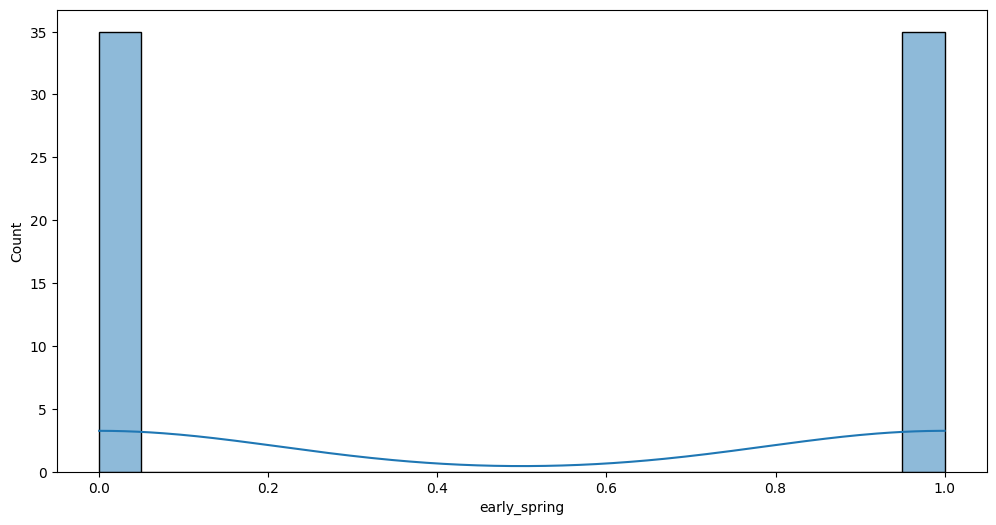

In [29]:
#early_spring

plt.figure(figsize=(12, 6))

# Create the histogram

sns.histplot(data['early_spring'], bins=20, kde=True)

In [30]:
#check all na values in precipitation

#show all rows

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

data[[col for col in data if 'precipitation' in col]].isna().sum()
data[[col for col in data if 'snowfall' in col]].isna().sum()
data[[col for col in data if 'snowdepth' in col]].isna().sum()

snowdepth_1     3
snowdepth_2     2
snowdepth_3     2
snowdepth_4     1
snowdepth_5     1
snowdepth_6     1
snowdepth_7     2
snowdepth_8     0
snowdepth_9     1
snowdepth_10    1
snowdepth_11    0
snowdepth_12    1
snowdepth_13    3
snowdepth_14    2
snowdepth_15    1
snowdepth_16    1
snowdepth_17    1
snowdepth_18    1
snowdepth_19    1
snowdepth_20    1
snowdepth_21    1
snowdepth_22    0
snowdepth_23    0
snowdepth_24    1
snowdepth_25    1
snowdepth_26    2
snowdepth_27    1
snowdepth_28    1
snowdepth_29    1
snowdepth_30    1
snowdepth_31    1
snowdepth_32    2
snowdepth_33    0
snowdepth_34    0
snowdepth_35    0
snowdepth_36    0
snowdepth_37    3
snowdepth_38    2
snowdepth_39    2
snowdepth_40    1
snowdepth_41    1
snowdepth_42    1
snowdepth_43    1
snowdepth_44    1
snowdepth_45    1
snowdepth_46    1
snowdepth_47    1
snowdepth_48    1
snowdepth_49    1
snowdepth_50    1
snowdepth_51    2
snowdepth_52    1
snowdepth_53    0
snowdepth_54    0
snowdepth_55    1
snowdepth_

In [31]:
#drop any column with day in it
data = data.drop(columns=[col for col in data if 'day' in col])

#code to check which values of early spring are NAN
data[data['early_spring'].isnull()]

#impute -1 into the NAN values of early_spring
data['early_spring'] = data['early_spring'].fillna(-1)

# make early_spring (True if its an early spring False if its not) 1 if its an early spring and 0 if its not an early spring
data['early_spring'] = data['early_spring'].astype(int)

data['early_spring'].value_counts()



early_spring
0    35
1    35
Name: count, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split



# Perform the train-test split, stratifying by the combined variable
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='early_spring'), data['early_spring'], test_size=0.1, random_state=42, stratify=data['early_spring'])

## Get the Data Notes

- Took 10% for test because of small data size
- Filled NAN values of early_spring with unknown and converted true and false to strings so I could stratify. 

Things I'm interested in for data visualizaion
- Do different days have more or less of an effect on whether its an early spring or not?

# Explore the Data

In [33]:
X_train.drop(columns='prediction', inplace=True)

In [34]:
y_train.value_counts()

early_spring
1    32
0    31
Name: count, dtype: int64

In [35]:
#combine x train and y train
train = X_train.copy()
train['early_spring'] = y_train

| **Feature**         | **Type**       | **% Missing Values**  | **Noisiness (Outliers, Gaps, etc.)** | **Usefulness (Business Goal)**                          | **Distribution**                                          |
|---------------------|----------------|-----------------------|--------------------------------------|---------------------------------------------------------|-----------------------------------------------------------|
| max_temp            | numerical       | 0%                | Outliers detected (5)                | Highly useful (affects early spring)                     | Normal distribution with slight skew                      |
| min_temp            | numerical       | 0%                | Outliers detected (2)                | Highly useful (affects early spring)                     | Normal distribution with slight skew                      |
| avg_temp            | numerical       | 0%                | No outliers detected                 | Highly useful (affects early spring)                     | Normal distribution                                       |
| precipitation       | numerical       | 0%                | Outliers detected (7)                | Somewhat useful (affects snow/soil)                      | Highly skewed (low values dominate) - Log Normal          |
| snowfall            | numerical       | 0%                | Outliers detected (7)                | Important for snow coverage                              | Normal distribution            |
| snowdepth           | numerical       | 1.587302%                | Outliers detected (4)                | Useful (indicates snow cover)                            | Normal Distribution                |
| early_spring        | categorical            | 0%                | No issues detected                   | Target variable                                          | Binary: True/False                                        |
| mean_soil_moisture  | numerical       | 0%                | No outliers detected                 | Useful for predicting soil conditions                    | Skewed, concentrated around a median                      |
| min_soil_temp       | numerical       | 0%                | Outliers detected (8)                | Relevant (affects soil temperature)                      | Skewed, with negative values                              |
| min_soil_moisture   | numerical       | 0%                | No outliers detected                 | Some relevance                                           | Skewed, concentrated in a narrow range                    |
| max_soil_temp       | numerical       | 0%                | Outliers detected (10)               | Relevant for planting decisions                          | Skewed but centered                                       |
| max_soil_moisture   | numerical       | 0%                | No outliers detected                 | Useful for soil moisture trends                          | Right-Skewed Distribution                                 |
| mean_soil_temp       | numerical       | 0%                | Outliers detected (7)               | Relevant for planting decisions                          | Skewed but centered                                       |
| DJF                 | numerical       | 4.761905%                | Outliers detected (0)   | Useful for El Nino changes                               | Slightly skewed, sort of Normal                           |
| JFM             | numerical       | 6.349206%                  | Outliers detected (0)                   | Useful for seasonal analysis (Winter months)             | Normal Distribution                   |
| FMA             | numerical       | 6.349206%                  | Outliers detected (0)                   | Useful for seasonal analysis (spring months)             | Normal Distribution                   |
| MAM             | numerical       | 6.349206%                  | Outliers detected (0)                  | Useful for seasonal analysis (spring months)             | Bimodial distribution                  |
| AMJ             | numerical       | 6.349206%                  | Outliers detected (0)                  | Useful for planting windows (late spring to early summer)| Normal Distribution                 |
| MJJ             | numerical       | 6.349206%                  | Outliers detected (0)                  | Useful for seasonal analysis (Summer months)             | Normal distribution                  |
| JJA             | numerical       | 6.349206%                  | Outliers detected (0)                 | Relevant for summer months                              | Normal distribution              |
| JAS             | numerical       | 6.349206%                  | Outliers detected (0)                 | Useful for late summer and harvesting trends             | Normal distribution                                               |
| ASO             | numerical       | 6.349206%                  | Outliers detected (0)                | Useful for late summer to early fall analysis            | Normal distribution                                |
| SON             | numerical       | 6.349206%                  | Outliers detected (0)                   | Relevant for fall seasons                                | Normal distribution                   |
| OND             | numerical       | 6.349206%                  | Outliers detected (0)                   | Useful for winter changes                                | Normal distribution             |
| NDJ             | numerical       | 6.349206%                  | Outliers detected (0)                   | Relevant for early winter                                | Bimodial distribution                         |


1. **Temperature Features (Max, Min, Avg)**:
   - These temperature features (max, min, and average) are highly useful for predicting early spring as they influence the soil temperature and overall growth conditions.
   - The distributions for these features are generally normal with slight skew, meaning that the majority of values are concentrated around the mean with a few outliers, particularly in extreme weather conditions.
   - No missing values are present, making these features reliable for modeling.

2. **Soil Moisture and Soil Temperature**:
   - These features are crucial for understanding the planting conditions, especially `mean_soil_moisture` and `max_soil_moisture`, which have a skewed but centered distribution. This suggests that soil moisture is consistent in certain ranges but there are outliers that may impact planting.
   - `max_soil_temp` and `min_soil_temp` are also essential as they affect planting decisions directly by indicating optimal growing conditions.
   - The distribution shows a skew towards certain values, indicating variability in soil moisture and temperature across the dataset, but no significant gaps or missing values were detected.

3. **Seasonal Features (FMA, MAM, etc.)**:
   - These features represent important seasonal trends for various months and combinations of months (e.g., FMA for February-March-April).
   - They are generally normally distributed with minor outliers, which is expected given seasonal temperature variations.
   - The usefulness of these features comes from their relevance to key planting and growing seasons, particularly spring and early summer, which influence the early spring predictions.

4. **Precipitation and Snowfall**:
   - These features are skewed, with precipitation and snowfall having highly skewed log-normal distributions. The majority of the values are low, but there are a few extreme cases.
   - Despite this skew, these features are still somewhat useful for understanding snow/soil dynamics, which indirectly affect early spring predictions.
   - These variables have no missing values, but the outliers may need further exploration to understand their impact on the model.

5. **DJF (December, January, February)**:
   - The `DJF` feature is used for analyzing El Nino and winter season changes. It shows some gaps and a slightly skewed distribution.
   - The feature could provide insights into the influence of winter temperature trends on the onset of early spring, particularly in extreme conditions like El Nino years.

6. **Early Spring**:
   - This is the target variable and has no missing values or issues detected. It is binary (True/False), which makes it ideal for classification tasks.
   - The overall model should focus on correlating other features to this target variable to make accurate predictions about early spring.

<Axes: xlabel='max_temp_1', ylabel='Count'>

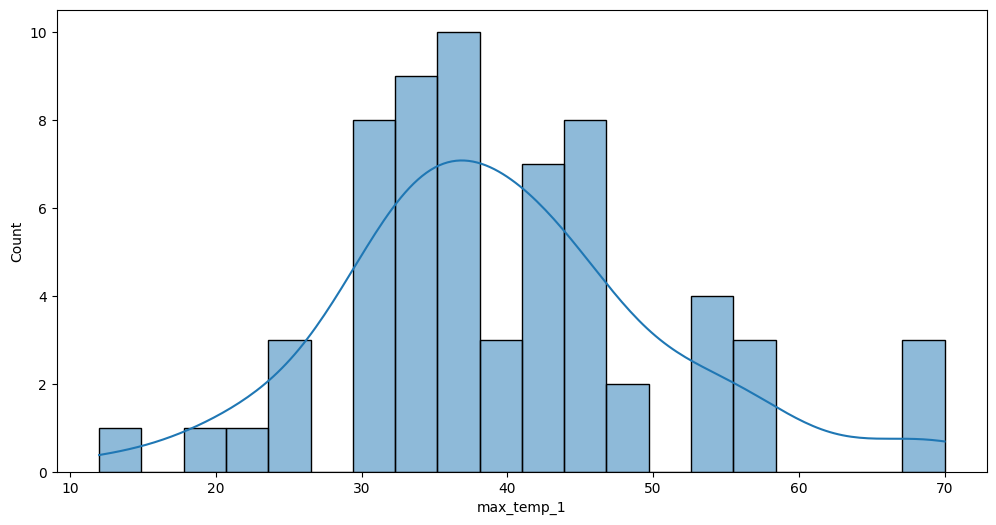

In [36]:
#histogram of max temp on jan 1st

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(train['max_temp_1'], bins=20, kde=True)

<Axes: xlabel='max_temp_32', ylabel='Count'>

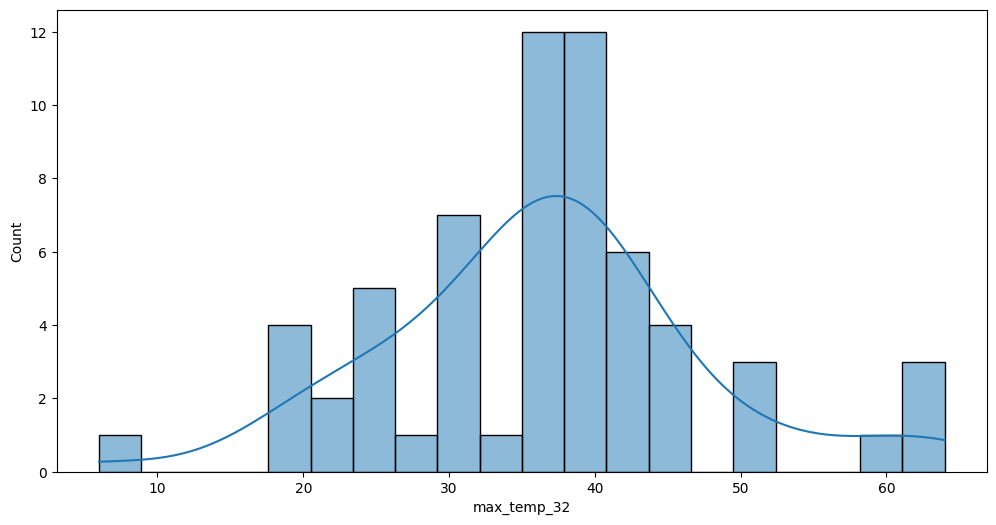

In [37]:
#histogram of max temp on feb 1st

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(train['max_temp_32'], bins=20, kde=True)

<Axes: xlabel='max_temp_56', ylabel='Count'>

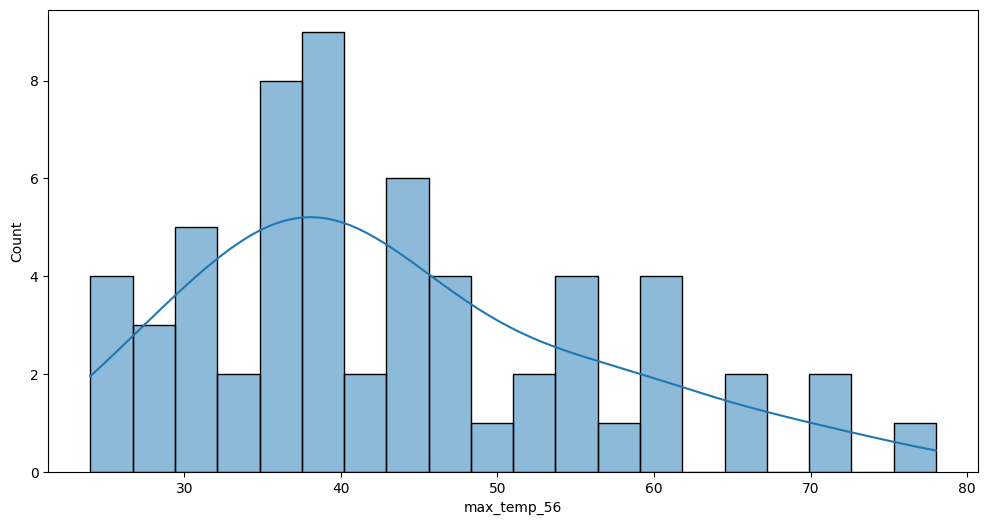

In [38]:
#histogram of max temp on feb 25th

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(train['max_temp_56'], bins=20, kde=True)

<Axes: xlabel='precipitation_1', ylabel='Count'>

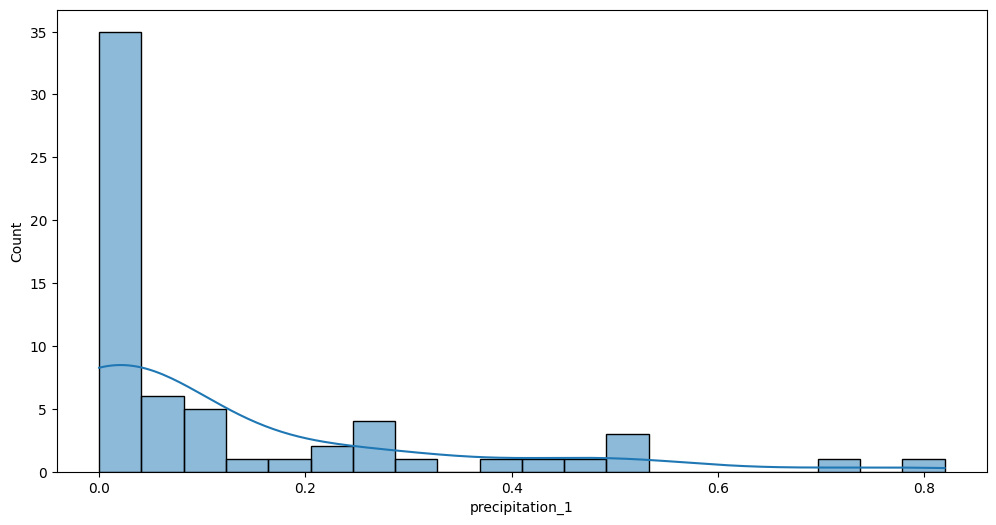

In [39]:
#histogram of precipitation jan 1

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(train['precipitation_1'], bins=20, kde=True)

In [40]:
#log all precipitation values and add them to the train data

train['log_precipitation_1'] = np.log1p(train['precipitation_1'])


<Axes: xlabel='log_precipitation_1', ylabel='Count'>

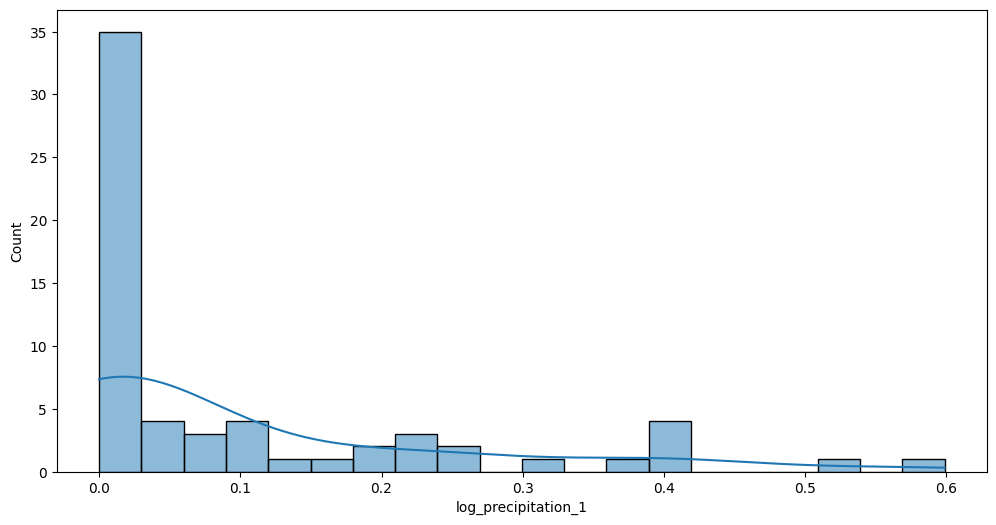

In [41]:
#histogram of log precipitation 1

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(train['log_precipitation_1'], bins=20, kde=True)

<Axes: >

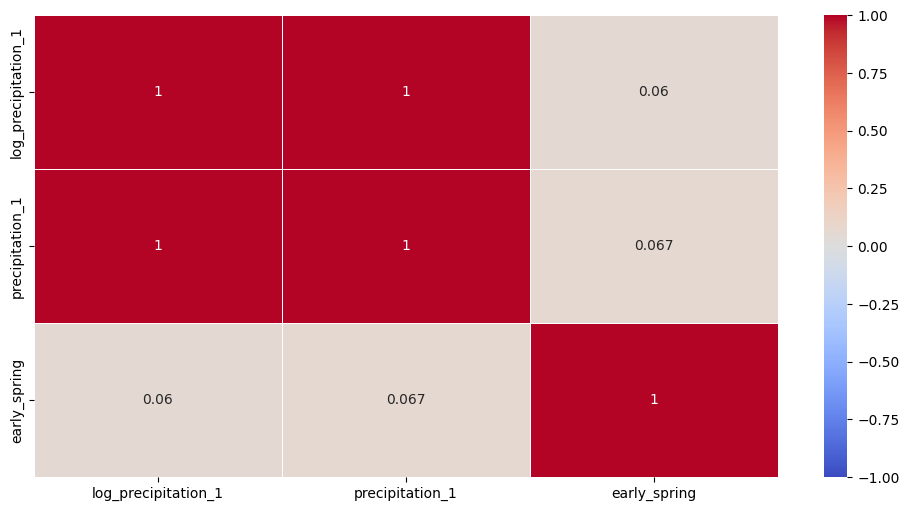

In [42]:
# see correlation between log precipitation 1, precipitation 1 and early spring

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# create corr matrix

corr_matrix = train[['log_precipitation_1', 'precipitation_1', 'early_spring']]

# Create the heatmap
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

Interestingly Precipitation_1 has more correlation than log_precipitation_1 despite looking log normal in our earlier analysis.

Same for all Precipitation days

<Axes: xlabel='snowdepth_1', ylabel='Count'>

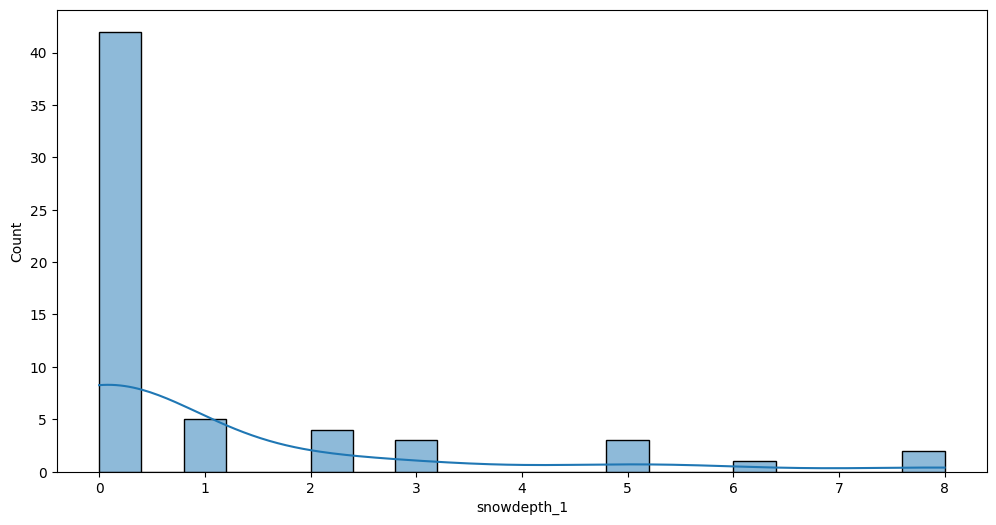

In [43]:
# hist of snowdepth on jan 1st

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(train['snowdepth_1'], bins=20, kde=True)



In [44]:
# create log snowdepth 1

# log snowdepth 1 and add it to train data
train['log_snowdepth_1'] = np.log1p(train['snowdepth_1'])


<Axes: xlabel='log_snowdepth_1', ylabel='Count'>

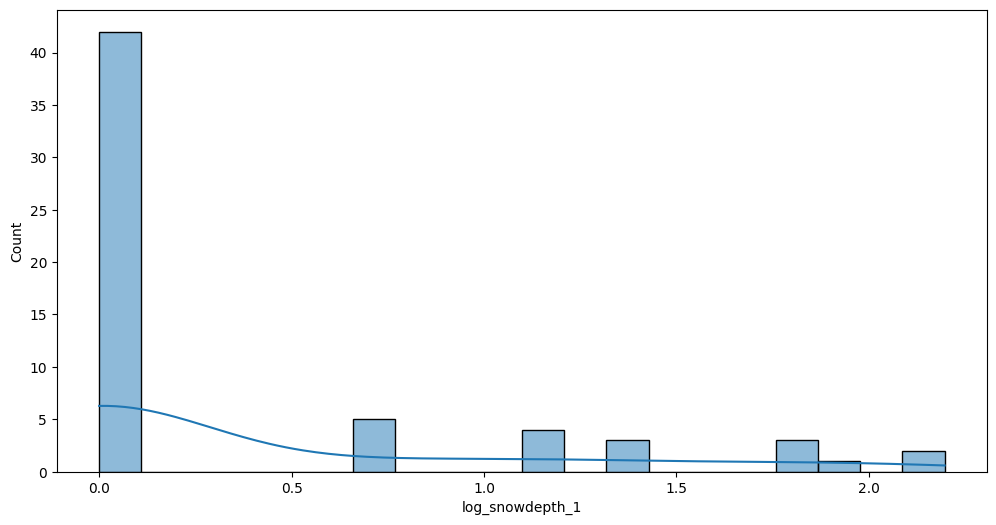

In [45]:
# hist of log snowdepth 1

# Set the figure size for better readability

plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(train['log_snowdepth_1'], bins=20, kde=True)


<Axes: >

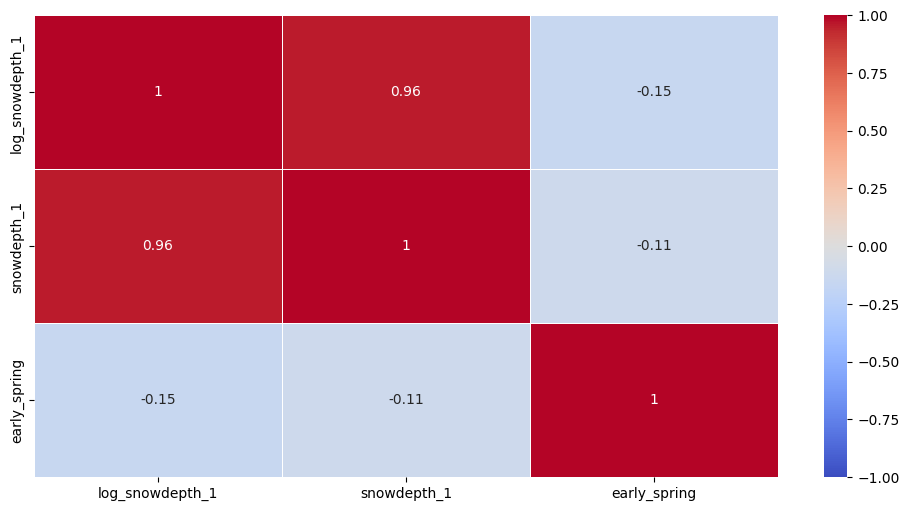

In [46]:
# corr matrix of log snowdepth 1, snowdepth 1 and early spring

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# create corr matrix
corr_matrix = train[['log_snowdepth_1', 'snowdepth_1', 'early_spring']]

# Create the heatmap
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

Yooooooo I see some changes. Will now try logging all of snow depth

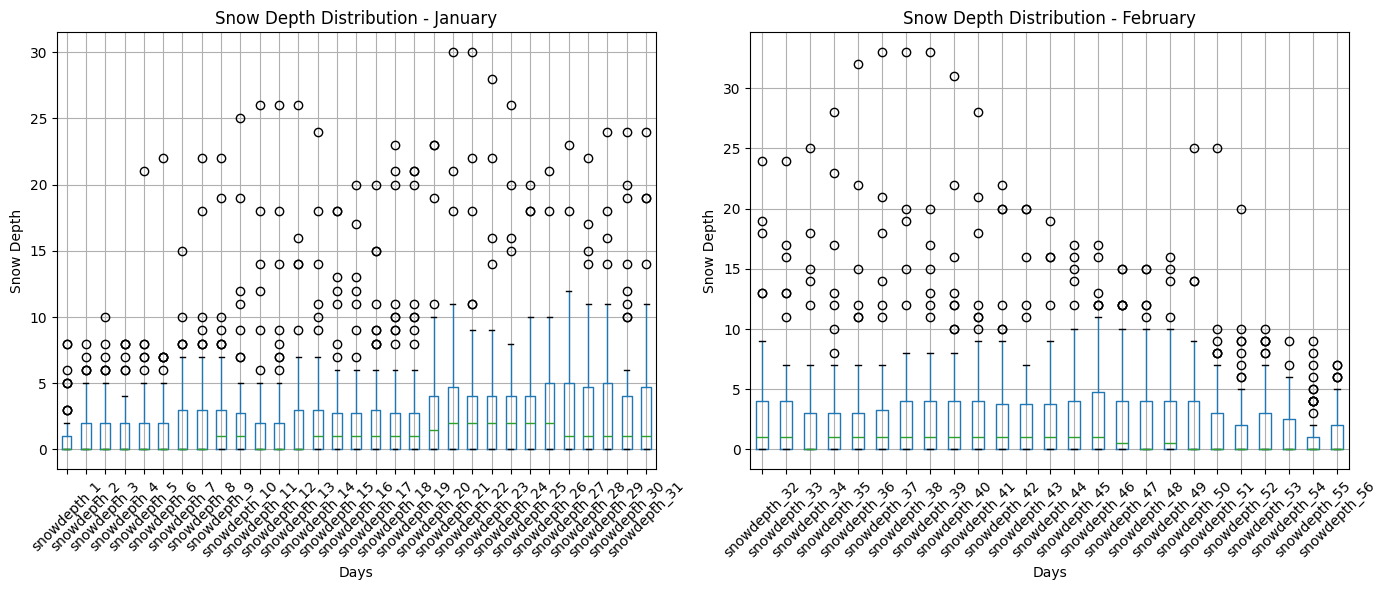

In [47]:
snow_depth_cols = [f'snowdepth_{i}' for i in range(1, 57)]
snow_depth_df = train[snow_depth_cols]

january_depths = snow_depth_df.iloc[:, 0:31]  # Days 1-31
february_depths = snow_depth_df.iloc[:, 31:56]  # Days 32-56


# Box plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
january_depths.boxplot()
plt.title('Snow Depth Distribution - January')
plt.xlabel('Days')
plt.ylabel('Snow Depth')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
february_depths.boxplot()
plt.title('Snow Depth Distribution - February')
plt.xlabel('Days')
plt.ylabel('Snow Depth')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Very interesting. It looks as if we get less snow during the first days of janurary and the end of Februrary

<Axes: >

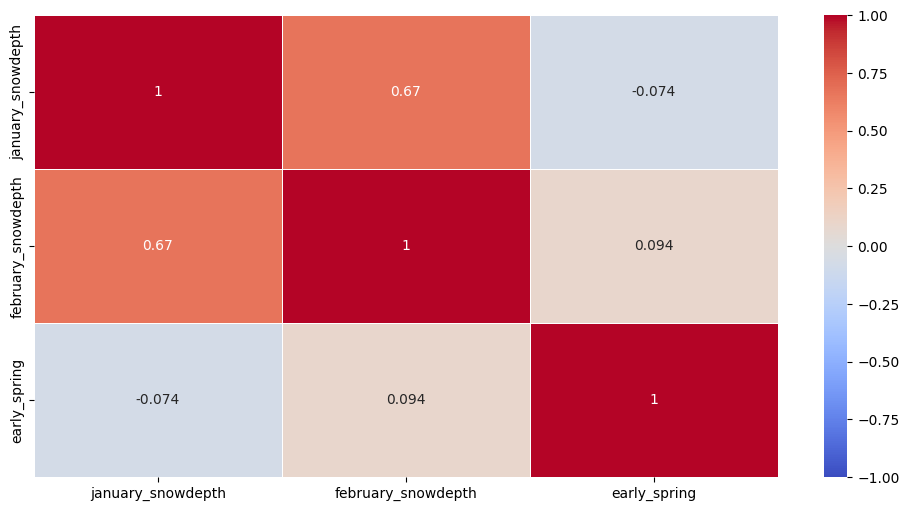

In [48]:
# corr matrix of combined jan snowdepths, and combined feb snowdepths, and early spring

#add snowdepth columns to combined data
train[snow_depth_cols] = train[snow_depth_cols]

#combine first 31 days of snowdepth and last 25 days of snowdepth

train['january_snowdepth'] = train[snow_depth_cols[:31]].sum(axis=1)
train['february_snowdepth'] = train[snow_depth_cols[31:56]].sum(axis=1)


# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# create corr matrix

corr_matrix = train[['january_snowdepth', 'february_snowdepth', 'early_spring']]

# Create the heatmap
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

<Axes: xlabel='january_snowdepth', ylabel='Count'>

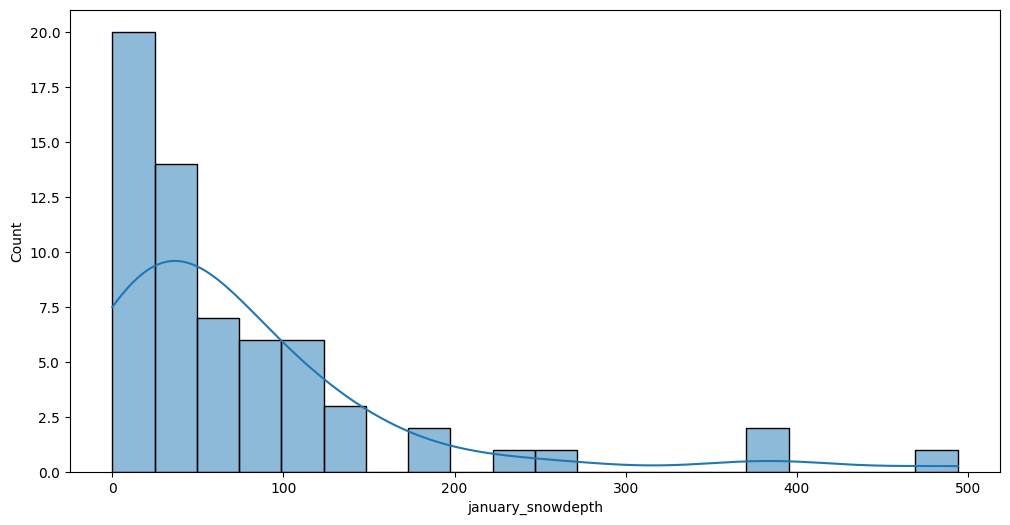

In [49]:
#plot january snowdepth

# Set the figure size for better readability

plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(train['january_snowdepth'], bins=20, kde=True)

<Axes: xlabel='february_snowdepth', ylabel='Count'>

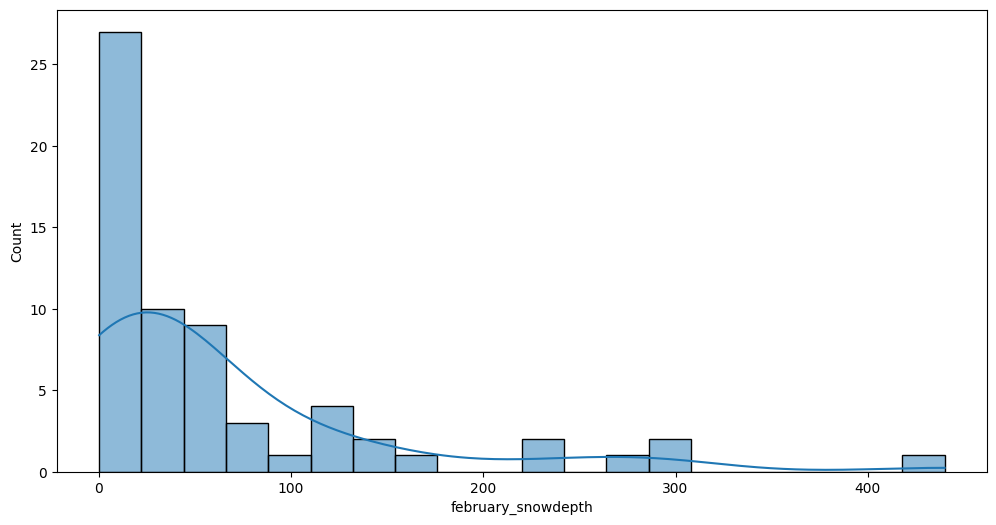

In [50]:
#plot february snowdepth

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(train['february_snowdepth'], bins=20, kde=True)

<Axes: >

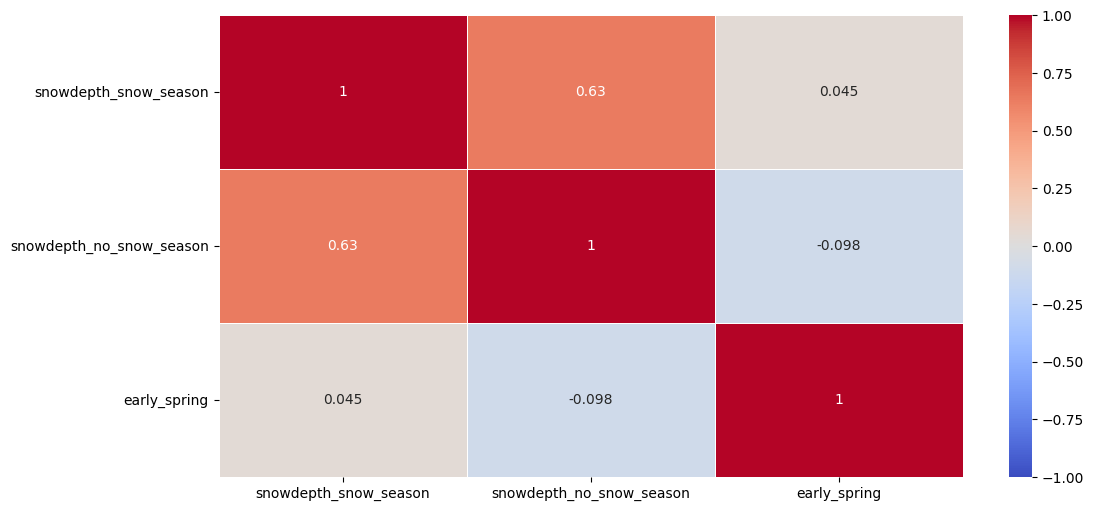

In [51]:
# break up middle 50% of snowdepths into "snowdepth_snow_season" and "snowdepth_no_snow_season"

#make day 9-day 42 snowdepths into snowdepth_snow_season

train['snowdepth_snow_season'] = train[snow_depth_cols[8:42]].sum(axis=1)

#make day 1-8 and day 43-56 snowdepths into snowdepth_no_snow_season

train['snowdepth_no_snow_season'] = train[snow_depth_cols[:8] + snow_depth_cols[42:56]].sum(axis=1)

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# create corr matrix

corr_matrix = train[['snowdepth_snow_season', 'snowdepth_no_snow_season', 'early_spring']]

# Create the heatmap
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)



<Axes: >

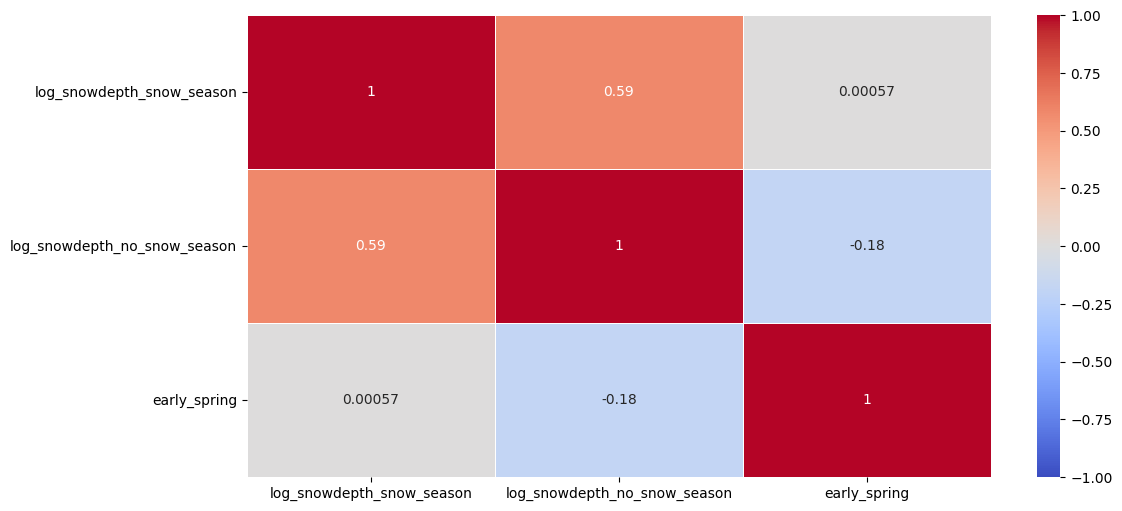

In [52]:
# log both snowdepths

train['log_snowdepth_snow_season'] = np.log1p(train['snowdepth_snow_season'])

train['log_snowdepth_no_snow_season'] = np.log1p(train['snowdepth_no_snow_season'])

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the correlation matrix

corr_matrix = train[['log_snowdepth_snow_season', 'log_snowdepth_no_snow_season', 'early_spring']]

# Create the heatmap
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

HUUUUUUUGE JUMP

<Axes: xlabel='log_snowdepth_snow_season', ylabel='Count'>

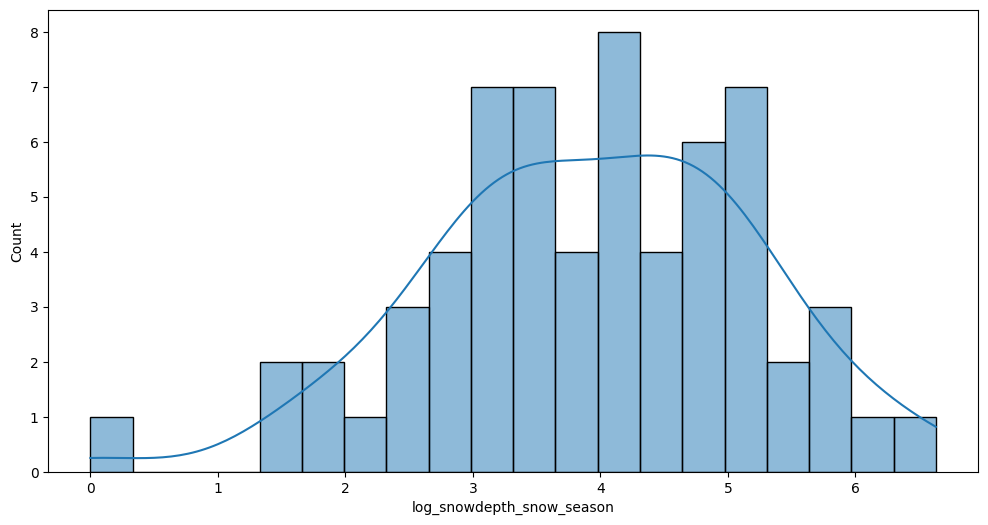

In [53]:
#histogram of log snowdepth snow season

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(train['log_snowdepth_snow_season'], bins=20, kde=True)

<Axes: xlabel='snowdepth_no_snow_season', ylabel='Count'>

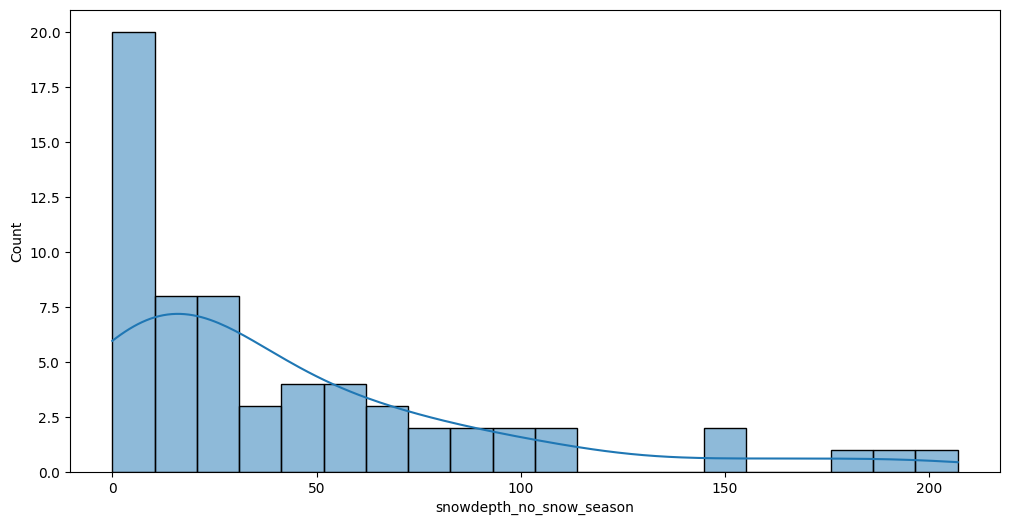

In [54]:
#histogram of snowdepth no snow season

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(train['snowdepth_no_snow_season'], bins=20, kde=True)

<Axes: xlabel='log_snowdepth_no_snow_season', ylabel='Count'>

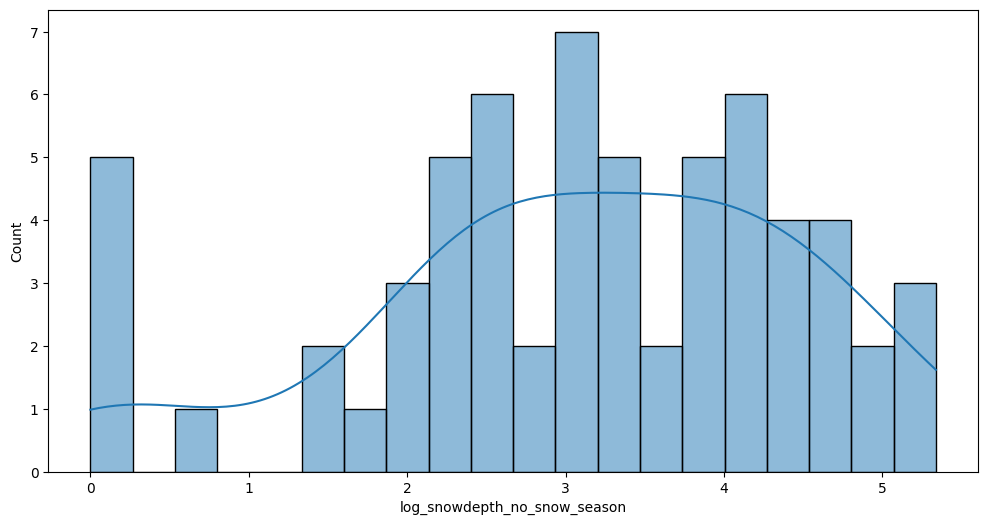

In [55]:
# histogram of log snowdepth no snow season

# Set the figure size for better readability

plt.figure(figsize=(12, 6))

# Create the histogram

sns.histplot(train['log_snowdepth_no_snow_season'], bins=20, kde=True)


<Axes: xlabel='snowdepth_56', ylabel='Count'>

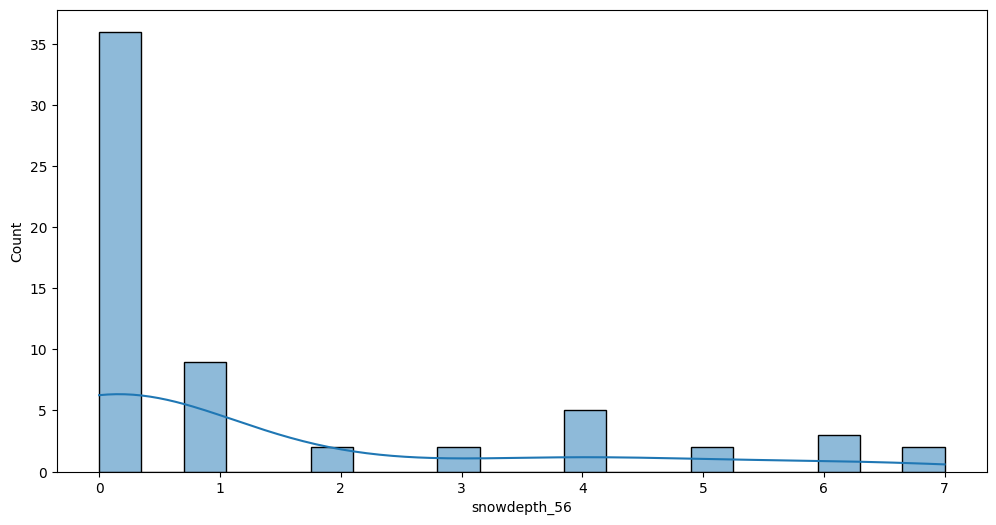

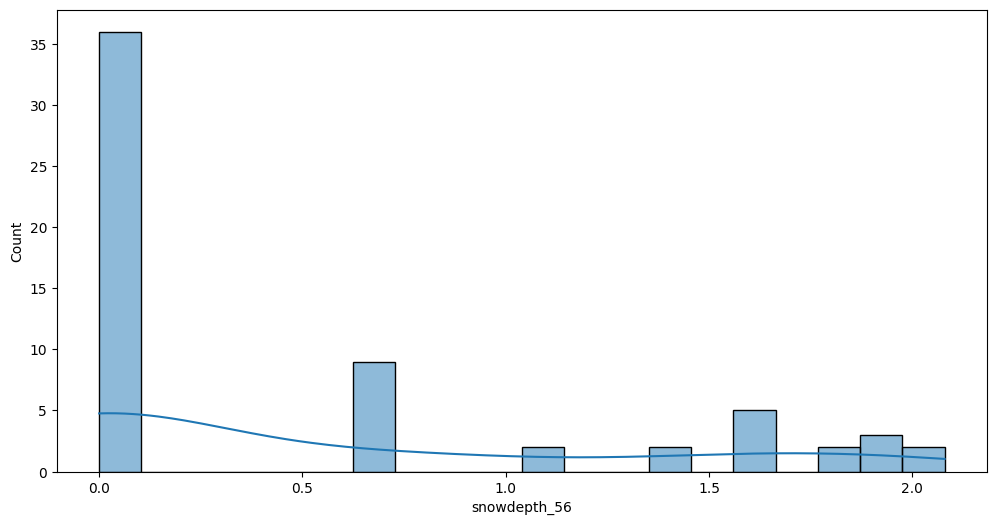

In [56]:
#snowdepth feb 25

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(train['snowdepth_56'], bins=20, kde=True)

#log snowdepth 25

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(np.log1p(train['snowdepth_56']), bins=20, kde=True)

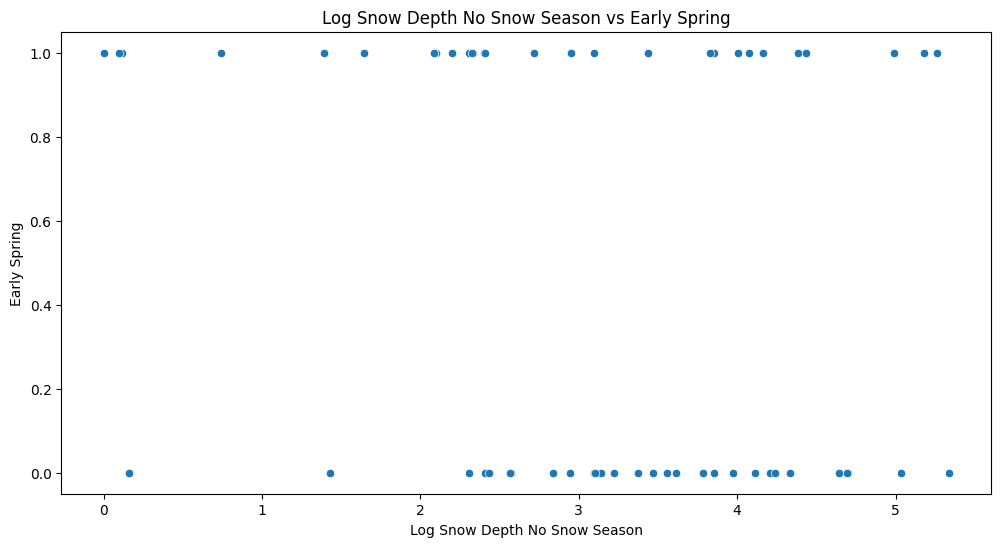

In [57]:
#scatterplot of log snowdepth no snow season and early spring

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the scatter plot
sns.scatterplot(train, x='log_snowdepth_no_snow_season', y='early_spring')
plt.title('Log Snow Depth No Snow Season vs Early Spring')
plt.xlabel('Log Snow Depth No Snow Season')
plt.ylabel('Early Spring')
plt.show()


# check day 42 to 53 for snowfall 

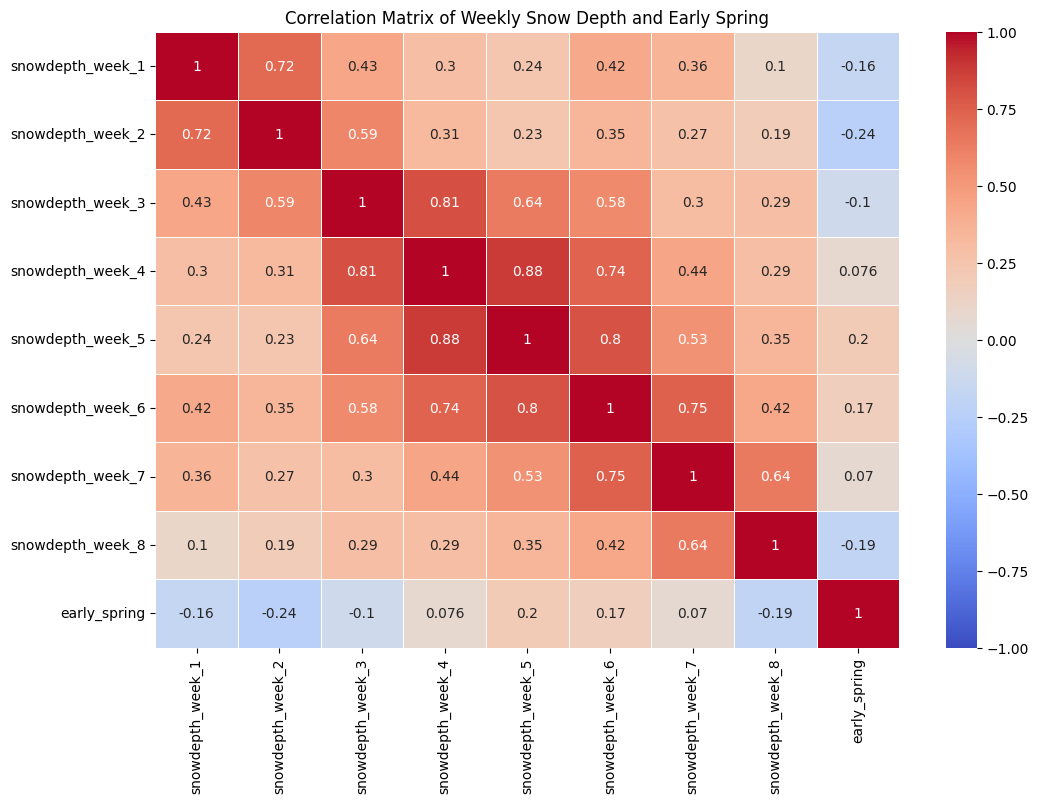

In [58]:
# Define the number of days in each week
days_in_week = 7

# Create new columns for each week's total snow depth
for week in range(1, 9):  # There are 8 weeks in 56 days
    start_day = (week - 1) * days_in_week + 1
    end_day = week * days_in_week
    week_col_name = f'snowdepth_week_{week}'
    week_cols = [f'snowdepth_{day}' for day in range(start_day, end_day + 1)]
    train[week_col_name] = train[week_cols].sum(axis=1)

# Calculate the correlation matrix
week_cols = [f'snowdepth_week_{week}' for week in range(1, 9)]
corr_matrix_weeks = train[week_cols + ['early_spring']].corr()

# Display the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_weeks, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Weekly Snow Depth and Early Spring')
plt.show()

Some of the weeks have some sort of correlation with the target label

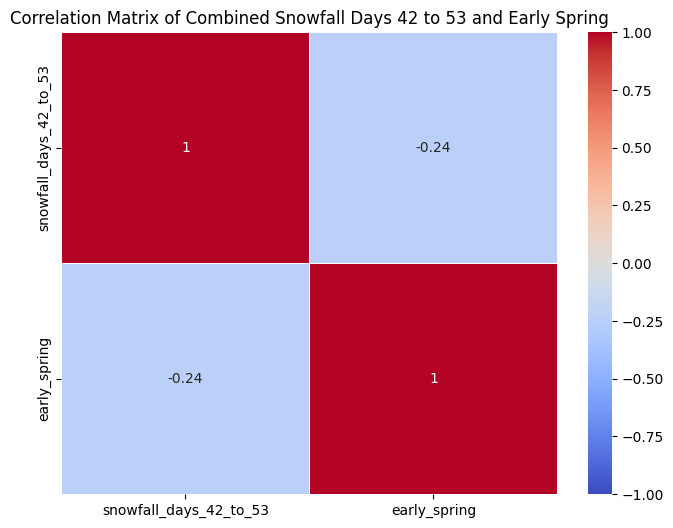

In [59]:
# define snowfall_days_42_to_53
snowfall_days_42_to_53 = [f'snowfall_{i}' for i in range(42, 54)]

# Combine snowfall columns from day 42 to day 53 into a single feature
train['snowfall_days_42_to_53'] = train[snowfall_days_42_to_53].sum(axis=1)

# Calculate the correlation matrix
corr_matrix_combined = train[['snowfall_days_42_to_53', 'early_spring']].corr()

# Display the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_combined, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Combined Snowfall Days 42 to 53 and Early Spring')
plt.show()

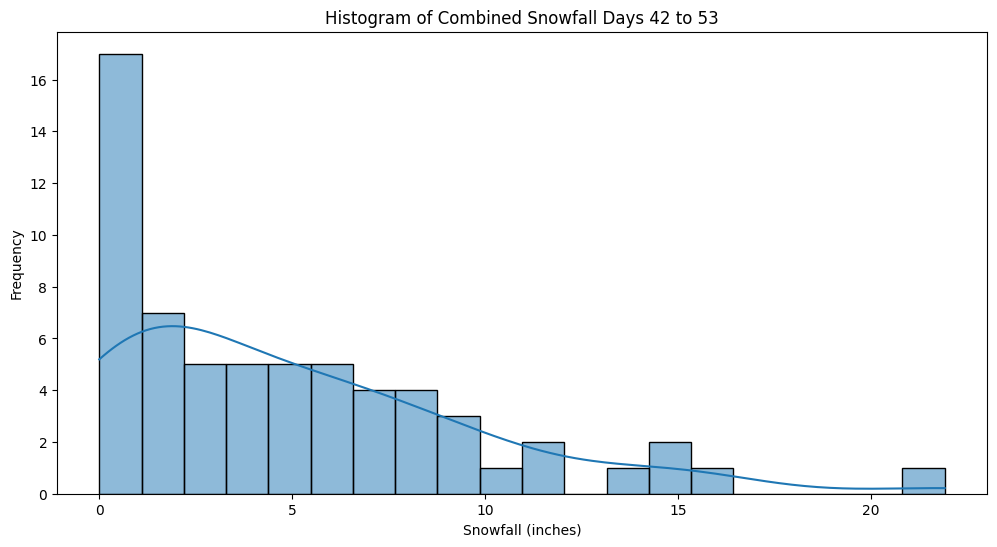

In [60]:
# show histogram for snowfall days 42 to 53
plt.figure(figsize=(12, 6))
sns.histplot(train['snowfall_days_42_to_53'], bins=20, kde=True)
plt.title('Histogram of Combined Snowfall Days 42 to 53')
plt.xlabel('Snowfall (inches)')
plt.ylabel('Frequency')
plt.show()

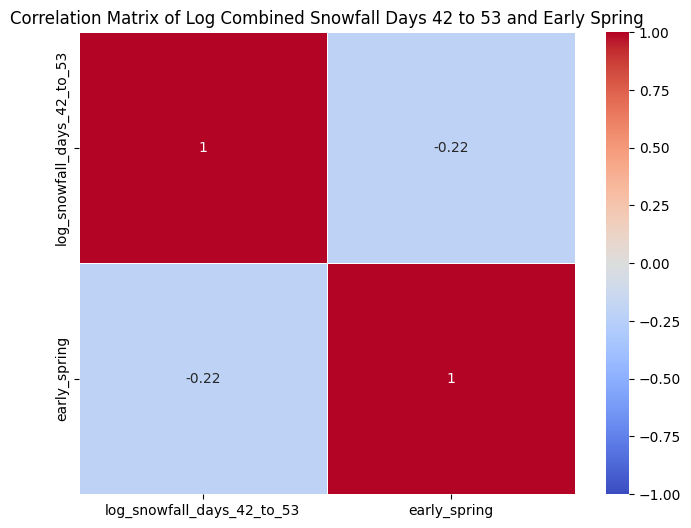

In [61]:
train['log_snowfall_days_42_to_53'] = np.log1p(train['snowfall_days_42_to_53'])

# Heatmap correlation for log snowfall days 42 to 53 and early spring
corr_matrix_log_snowfall = train[['log_snowfall_days_42_to_53', 'early_spring']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_log_snowfall, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Log Combined Snowfall Days 42 to 53 and Early Spring')
plt.show()


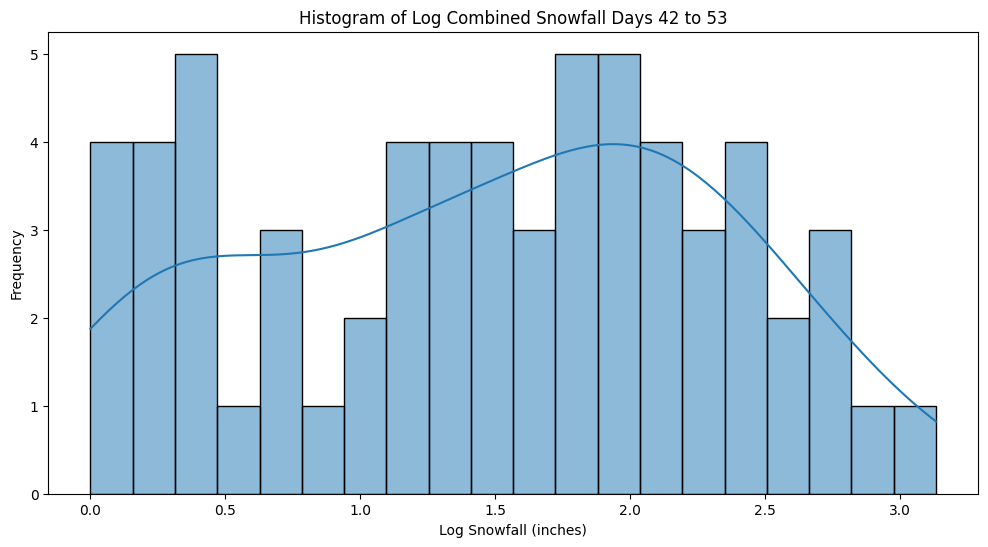

In [62]:
# histogram of log snowfall days 42 to 53
plt.figure(figsize=(12, 6))
sns.histplot(train['log_snowfall_days_42_to_53'], bins=20, kde=True)
plt.title('Histogram of Log Combined Snowfall Days 42 to 53')
plt.xlabel('Log Snowfall (inches)')
plt.ylabel('Frequency')
plt.show()

logging snowfall made it look more uniform rather than normal 

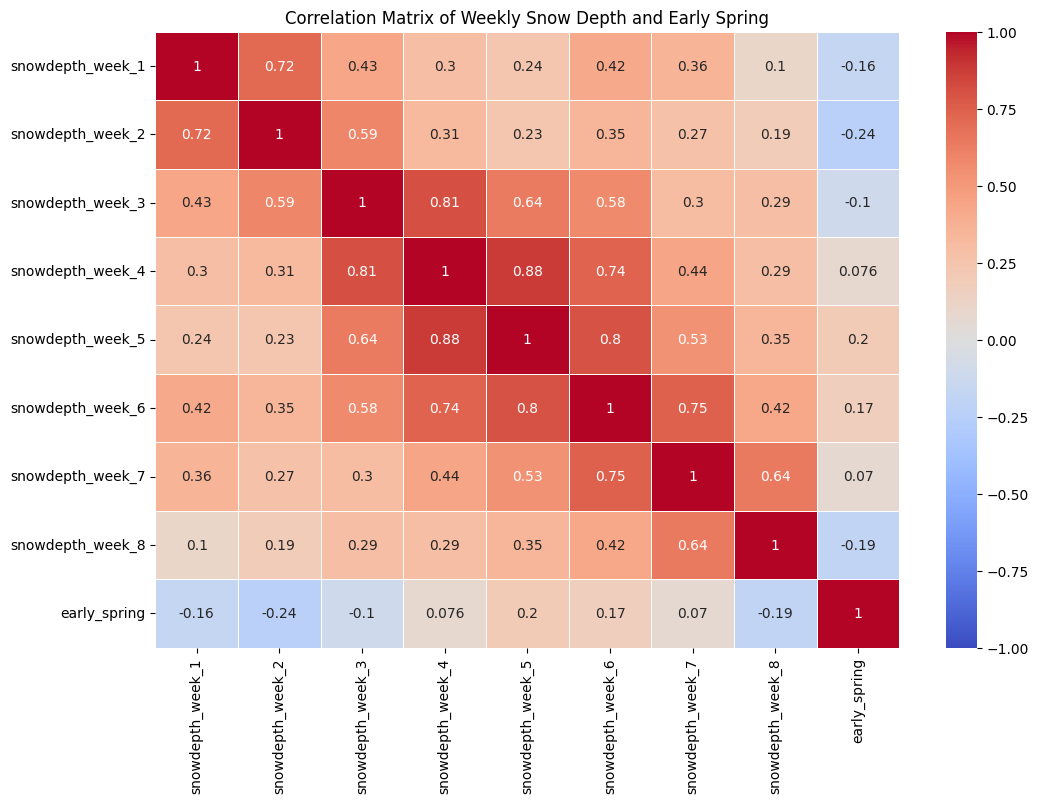

In [63]:
# Define the number of days in each week
days_in_week = 7

# Create new columns for each week's total snow depth
for week in range(1, 9):  # There are 8 weeks in 56 days
    start_day = (week - 1) * days_in_week + 1
    end_day = week * days_in_week
    week_col_name = f'snowdepth_week_{week}'
    week_cols = [f'snowdepth_{day}' for day in range(start_day, end_day + 1)]
    train[week_col_name] = train[week_cols].sum(axis=1)

# Calculate the correlation matrix
week_cols = [f'snowdepth_week_{week}' for week in range(1, 9)]
corr_matrix_weeks_snowdepth = train[week_cols + ['early_spring']].corr()

# Display the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_weeks_snowdepth, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Weekly Snow Depth and Early Spring')
plt.show()

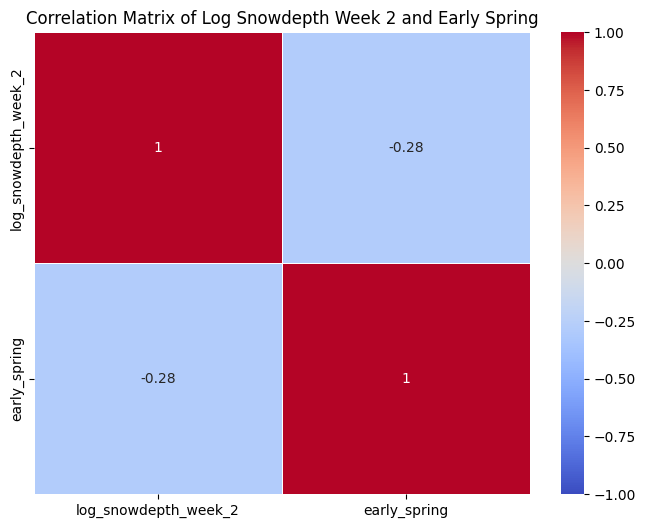

In [64]:
# Log-transform snowdepth_week_2
train['log_snowdepth_week_2'] = np.log1p(train['snowdepth_week_2'])

# Calculate the correlation matrix
corr_matrix_log_week_2 = train[['log_snowdepth_week_2', 'early_spring']].corr()

# Display the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_log_week_2, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Log Snowdepth Week 2 and Early Spring')
plt.show()

<Axes: >

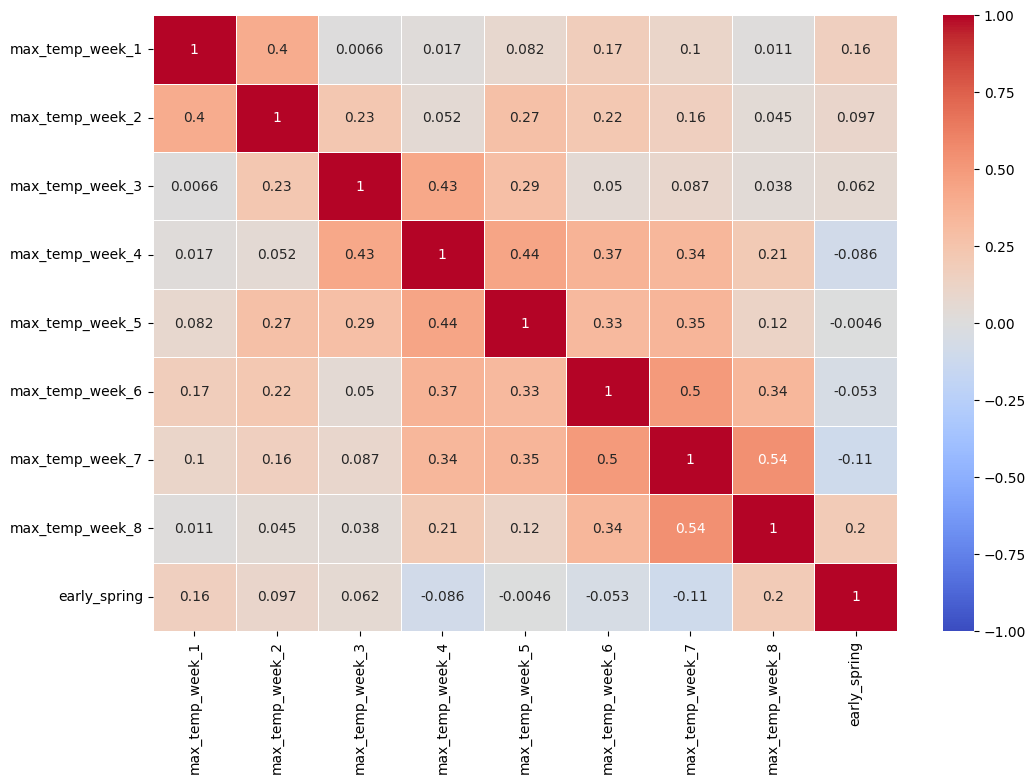

In [65]:
# Break up max temp into weeks

# Define the number of days in each week
days_in_week = 7

# Create new columns for each week's total max temp

for week in range(1, 9):  # There are 8 weeks in 56 days
    start_day = (week - 1) * days_in_week + 1
    end_day = week * days_in_week
    week_col_name = f'max_temp_week_{week}'
    week_cols = [f'max_temp_{day}' for day in range(start_day, end_day + 1)]
    train[week_col_name] = train[week_cols].sum(axis=1)

# Calculate the correlation matrix
week_cols = [f'max_temp_week_{week}' for week in range(1, 9)]

corr_matrix_weeks_max_temp = train[week_cols + ['early_spring']].corr()

# Display the correlation matrix
plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix_weeks_max_temp, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)


<Axes: >

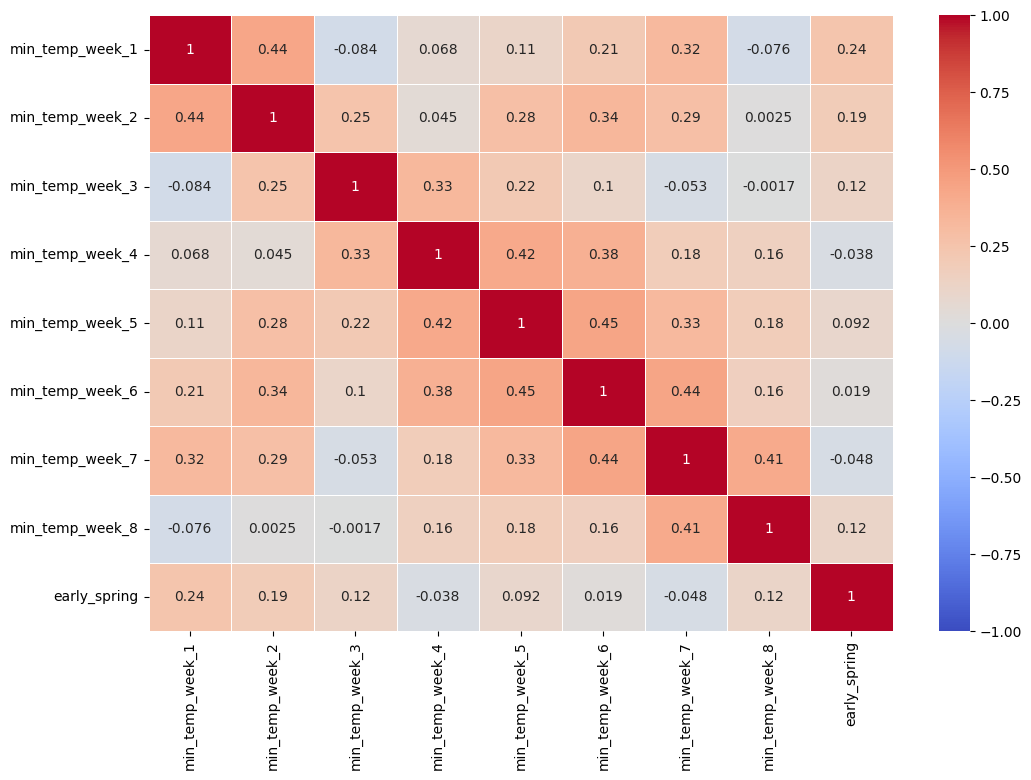

In [66]:
# break up min temp into weeks

# Define the number of days in each week
days_in_week = 7

# Create new columns for each week's total min temp

for week in range(1, 9):  # There are 8 weeks in 56 days
    start_day = (week - 1) * days_in_week + 1
    end_day = week * days_in_week
    week_col_name = f'min_temp_week_{week}'
    week_cols = [f'min_temp_{day}' for day in range(start_day, end_day + 1)]
    train[week_col_name] = train[week_cols].sum(axis=1)


# Calculate the correlation matrix
week_cols = [f'min_temp_week_{week}' for week in range(1, 9)]
corr_matrix_weeks_min_temp = train[week_cols + ['early_spring']].corr()

# Display the correlation matrix
plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix_weeks_min_temp, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

/var/folders/bp/tqx1fv0145x29m0h097lbn2r0000gp/T/ipykernel_439/2115300592.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[week_col_name] = train[week_cols].sum(axis=1)
/var/folders/bp/tqx1fv0145x29m0h097lbn2r0000gp/T/ipykernel_439/2115300592.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[week_col_name] = train[week_cols].sum(axis=1)


<Axes: >

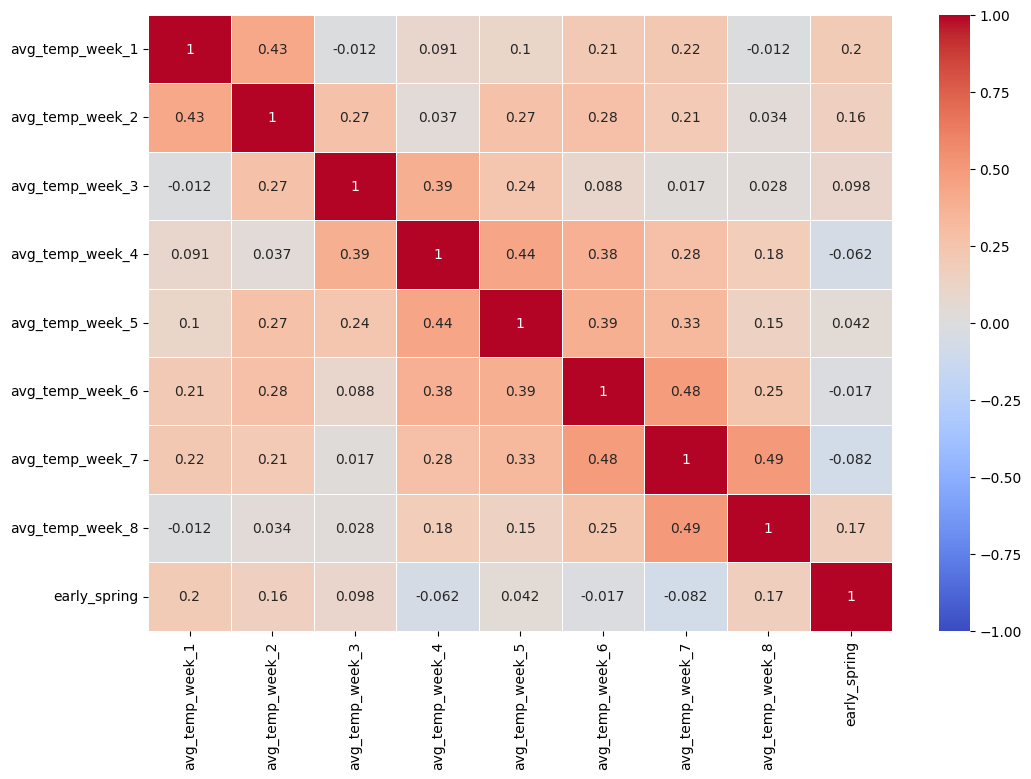

In [67]:
# break up avg temp into weeks

# Define the number of days in each week
days_in_week = 7

# Create new columns for each week's total avg temp

for week in range(1, 9):  # There are 8 weeks in 56 days
    start_day = (week - 1) * days_in_week + 1
    end_day = week * days_in_week
    week_col_name = f'avg_temp_week_{week}'
    week_cols = [f'avg_temp_{day}' for day in range(start_day, end_day + 1)]
    train[week_col_name] = train[week_cols].sum(axis=1)

# Calculate the correlation matrix
week_cols = [f'avg_temp_week_{week}' for week in range(1, 9)]

corr_matrix_weeks_avg_temp = train[week_cols + ['early_spring']].corr()

# Display the correlation matrix
plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix_weeks_avg_temp, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

/var/folders/bp/tqx1fv0145x29m0h097lbn2r0000gp/T/ipykernel_439/412558143.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[week_col_name] = train[week_cols].sum(axis=1)
/var/folders/bp/tqx1fv0145x29m0h097lbn2r0000gp/T/ipykernel_439/412558143.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[week_col_name] = train[week_cols].sum(axis=1)
/var/folders/bp/tqx1fv0145x29m0h097lbn2r0000gp/T/ipykernel_439/412558143.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

<Axes: >

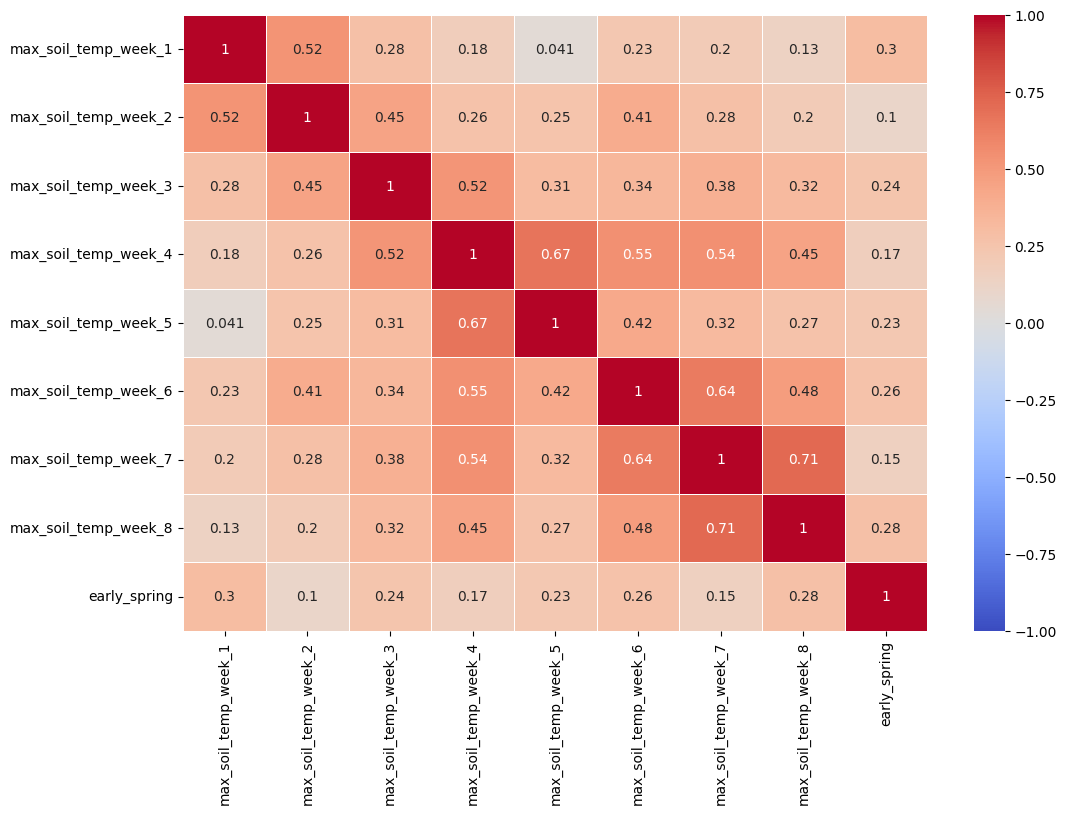

In [68]:
# Max soil temp

# Define the number of days in each week
days_in_week = 7

# Create new columns for each week's total max soil temp

for week in range(1, 9):  # There are 8 weeks in 56 days
    start_day = (week - 1) * days_in_week + 1
    end_day = week * days_in_week
    week_col_name = f'max_soil_temp_week_{week}'
    week_cols = [f'max_soil_temp_{day}' for day in range(start_day, end_day + 1)]
    train[week_col_name] = train[week_cols].sum(axis=1)

# Calculate the correlation matrix
week_cols = [f'max_soil_temp_week_{week}' for week in range(1, 9)]

corr_matrix_weeks_max_soil_temp = train[week_cols + ['early_spring']].corr()

# Display the correlation matrix
plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix_weeks_max_soil_temp, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

/var/folders/bp/tqx1fv0145x29m0h097lbn2r0000gp/T/ipykernel_439/1664278877.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[week_col_name] = train[week_cols].sum(axis=1)
/var/folders/bp/tqx1fv0145x29m0h097lbn2r0000gp/T/ipykernel_439/1664278877.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[week_col_name] = train[week_cols].sum(axis=1)
/var/folders/bp/tqx1fv0145x29m0h097lbn2r0000gp/T/ipykernel_439/1664278877.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fra

<Axes: >

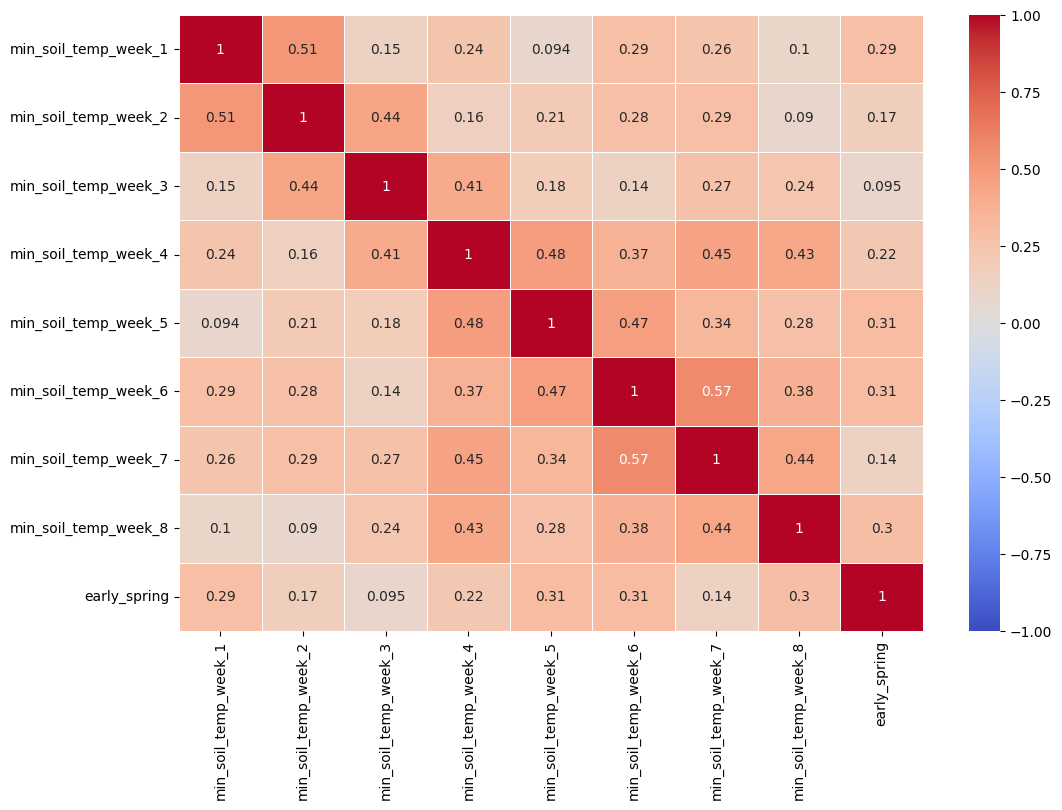

In [69]:
# min soil temp

# Define the number of days in each week

days_in_week = 7

# Create new columns for each week's total min soil temp

for week in range(1, 9):  # There are 8 weeks in 56 days
    start_day = (week - 1) * days_in_week + 1
    end_day = week * days_in_week
    week_col_name = f'min_soil_temp_week_{week}'
    week_cols = [f'min_soil_temp_{day}' for day in range(start_day, end_day + 1)]
    train[week_col_name] = train[week_cols].sum(axis=1)

# Calculate the correlation matrix
week_cols = [f'min_soil_temp_week_{week}' for week in range(1, 9)]

corr_matrix_weeks_min_soil_temp = train[week_cols + ['early_spring']].corr()

# Display the correlation matrix
plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix_weeks_min_soil_temp, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

/var/folders/bp/tqx1fv0145x29m0h097lbn2r0000gp/T/ipykernel_439/1022303339.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[week_col_name] = train[week_cols].sum(axis=1)
/var/folders/bp/tqx1fv0145x29m0h097lbn2r0000gp/T/ipykernel_439/1022303339.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[week_col_name] = train[week_cols].sum(axis=1)
/var/folders/bp/tqx1fv0145x29m0h097lbn2r0000gp/T/ipykernel_439/1022303339.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fra

<Axes: >

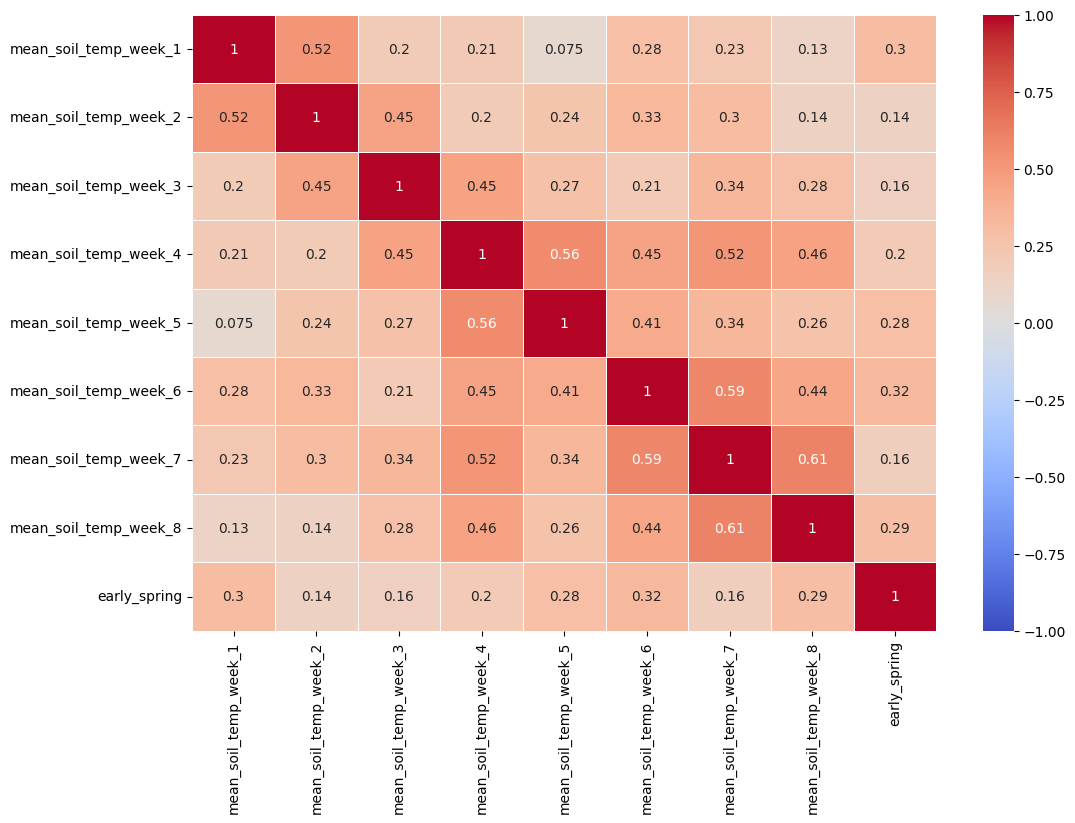

In [70]:
# mean soil temp

# Define the number of days in each week
days_in_week = 7

# Create new columns for each week's total avg soil temp

for week in range(1, 9):  # There are 8 weeks in 56 days
    start_day = (week - 1) * days_in_week + 1
    end_day = week * days_in_week
    week_col_name = f'mean_soil_temp_week_{week}'
    week_cols = [f'mean_soil_temp_{day}' for day in range(start_day, end_day + 1)]
    train[week_col_name] = train[week_cols].sum(axis=1)

# Calculate the correlation matrix
week_cols = [f'mean_soil_temp_week_{week}' for week in range(1, 9)]

corr_matrix_weeks_avg_soil_temp = train[week_cols + ['early_spring']].corr()

# Display the correlation matrix
plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix_weeks_avg_soil_temp, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)


/var/folders/bp/tqx1fv0145x29m0h097lbn2r0000gp/T/ipykernel_439/137635053.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[week_col_name] = train[week_cols].sum(axis=1)
/var/folders/bp/tqx1fv0145x29m0h097lbn2r0000gp/T/ipykernel_439/137635053.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[week_col_name] = train[week_cols].sum(axis=1)
/var/folders/bp/tqx1fv0145x29m0h097lbn2r0000gp/T/ipykernel_439/137635053.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

<Axes: >

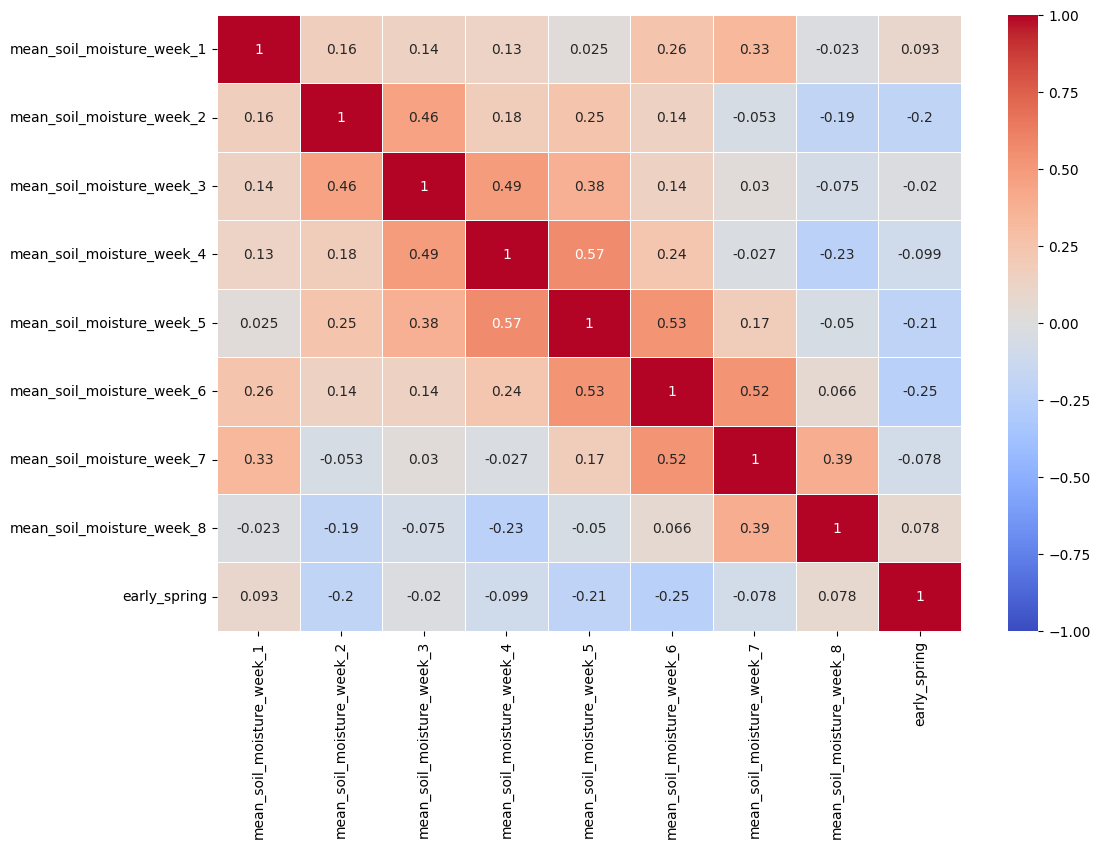

In [71]:
# mean soil moisture

# Define the number of days in each week
days_in_week = 7

# Create new columns for each week's total avg soil moisture

for week in range(1, 9):  # There are 8 weeks in 56 days
    start_day = (week - 1) * days_in_week + 1
    end_day = week * days_in_week
    week_col_name = f'mean_soil_moisture_week_{week}'
    week_cols = [f'mean_soil_moisture_{day}' for day in range(start_day, end_day + 1)]
    train[week_col_name] = train[week_cols].sum(axis=1)

# Calculate the correlation matrix
week_cols = [f'mean_soil_moisture_week_{week}' for week in range(1, 9)]

corr_matrix_weeks_avg_soil_moisture = train[week_cols + ['early_spring']].corr()

# Display the correlation matrix
plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix_weeks_avg_soil_moisture, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

/var/folders/bp/tqx1fv0145x29m0h097lbn2r0000gp/T/ipykernel_439/660501267.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[week_col_name] = train[week_cols].sum(axis=1)
/var/folders/bp/tqx1fv0145x29m0h097lbn2r0000gp/T/ipykernel_439/660501267.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[week_col_name] = train[week_cols].sum(axis=1)
/var/folders/bp/tqx1fv0145x29m0h097lbn2r0000gp/T/ipykernel_439/660501267.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

<Axes: >

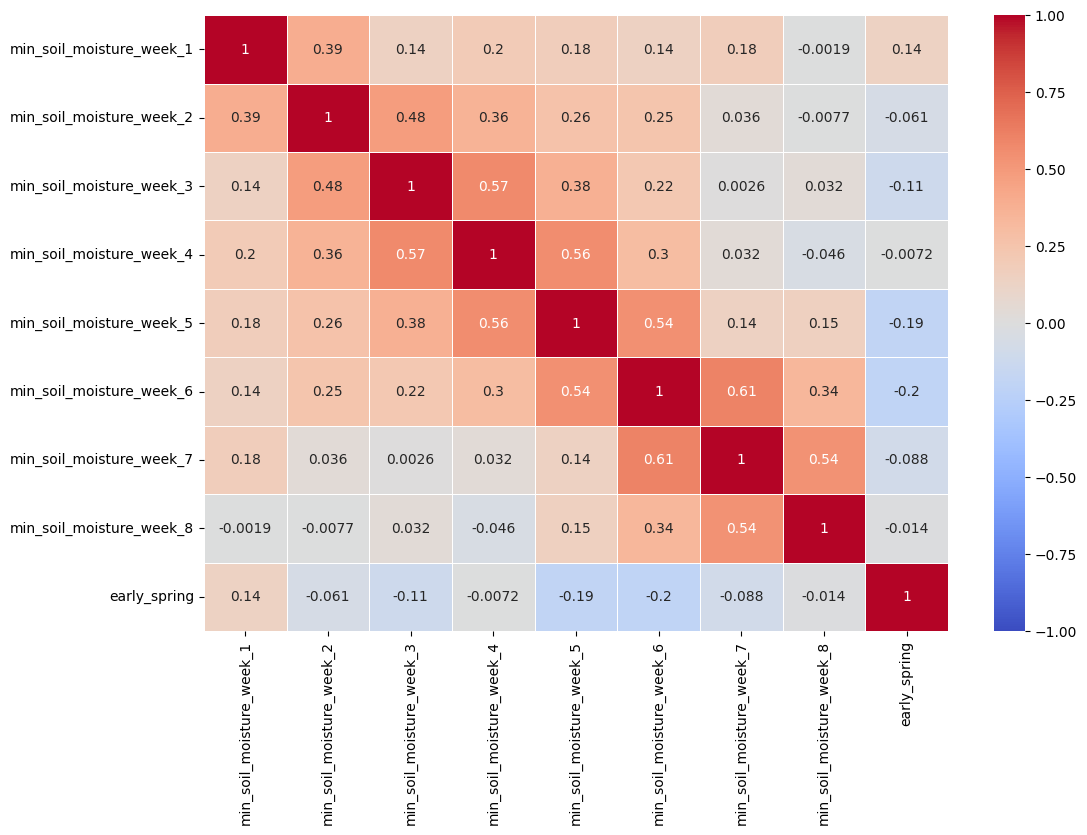

In [72]:
#min soil moisture

# Define the number of days in each week
days_in_week = 7   

# Create new columns for each week's total min soil moisture

for week in range(1, 9):  # There are 8 weeks in 56 days
    start_day = (week - 1) * days_in_week + 1
    end_day = week * days_in_week
    week_col_name = f'min_soil_moisture_week_{week}'
    week_cols = [f'min_soil_moisture_{day}' for day in range(start_day, end_day + 1)]
    train[week_col_name] = train[week_cols].sum(axis=1)


# Calculate the correlation matrix
week_cols = [f'min_soil_moisture_week_{week}' for week in range(1, 9)]

corr_matrix_weeks_min_soil_moisture = train[week_cols + ['early_spring']].corr()

# Display the correlation matrix
plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix_weeks_min_soil_moisture, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

/var/folders/bp/tqx1fv0145x29m0h097lbn2r0000gp/T/ipykernel_439/3151049838.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[week_col_name] = train[week_cols].sum(axis=1)
/var/folders/bp/tqx1fv0145x29m0h097lbn2r0000gp/T/ipykernel_439/3151049838.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[week_col_name] = train[week_cols].sum(axis=1)
/var/folders/bp/tqx1fv0145x29m0h097lbn2r0000gp/T/ipykernel_439/3151049838.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fra

<Axes: >

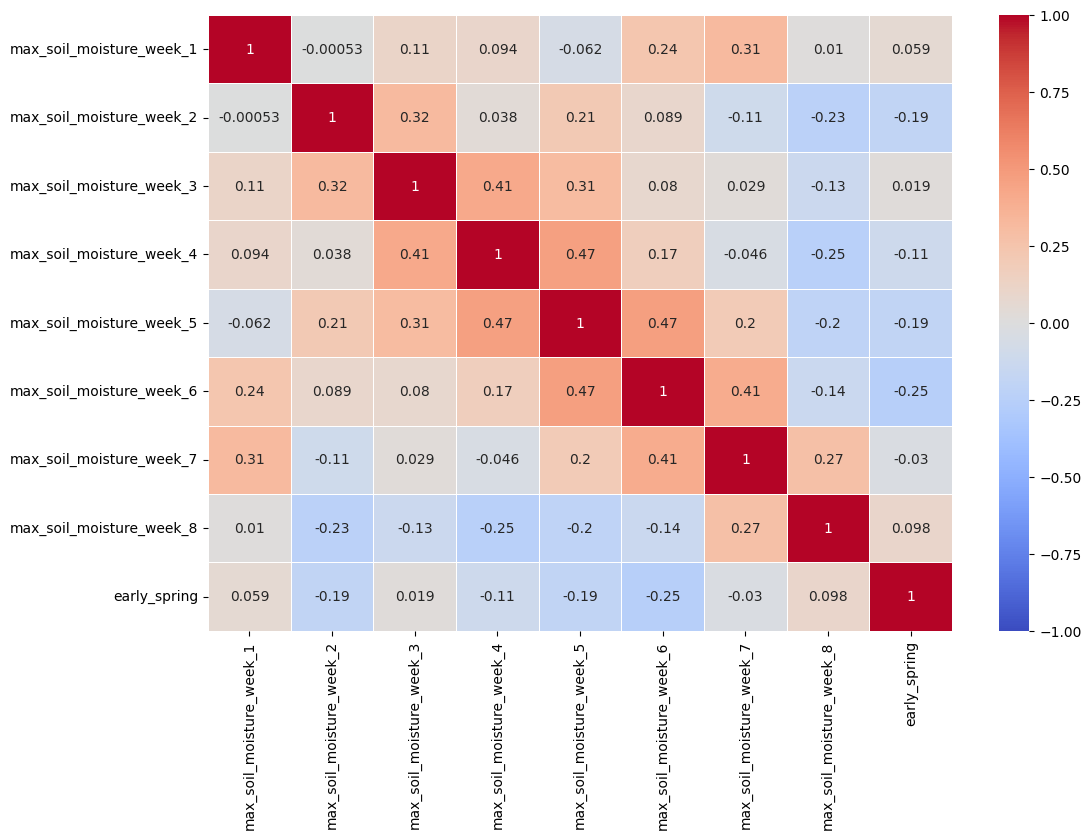

In [73]:
#max soil moisture

# Define the number of days in each week
days_in_week = 7

# Create new columns for each week's total max soil moisture

for week in range(1, 9):  # There are 8 weeks in 56 days
    start_day = (week - 1) * days_in_week + 1
    end_day = week * days_in_week
    week_col_name = f'max_soil_moisture_week_{week}'
    week_cols = [f'max_soil_moisture_{day}' for day in range(start_day, end_day + 1)]
    train[week_col_name] = train[week_cols].sum(axis=1)


# Calculate the correlation matrix
week_cols = [f'max_soil_moisture_week_{week}' for week in range(1, 9)]

corr_matrix_weeks_max_soil_moisture = train[week_cols + ['early_spring']].corr()

# Display the correlation matrix
plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix_weeks_max_soil_moisture, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

In [74]:
# get the delta of week to week for min soil moisture

# Define the number of days in each week
days_in_week = 7

# Create new columns for each week's total min soil moisture

for week in range(1, 8):  # There are 8 weeks in 56 days
    week_col_name = f'min_soil_moisture_week_{week}'
    next_week_col_name = f'min_soil_moisture_week_{week + 1}'
    train[f'min_soil_moisture_week_{week}_delta'] = train[next_week_col_name] - train[week_col_name]

# Calculate the correlation matrix
week_cols = [f'min_soil_moisture_week_{week}_delta' for week in range(1, 8)]


/var/folders/bp/tqx1fv0145x29m0h097lbn2r0000gp/T/ipykernel_439/1859933815.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f'min_soil_moisture_week_{week}_delta'] = train[next_week_col_name] - train[week_col_name]
/var/folders/bp/tqx1fv0145x29m0h097lbn2r0000gp/T/ipykernel_439/1859933815.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f'min_soil_moisture_week_{week}_delta'] = train[next_week_col_name] - train[week_col_name]
/var/folders/bp/tqx1fv0145x29m0h097lbn2r0000gp/T/ipykernel_439/1859933815.py:11: Perfo

In [75]:
# add all weeks in train to x_train

train = train.drop(columns='early_spring')


In [76]:
# Create the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(train, y_train)

# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a DataFrame from the feature importances
feature_importances_df = pd.DataFrame({
    'feature': train.columns,
    'importance': feature_importances
})

# Sort values by importance
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)

In [77]:
week_columns = [col for col in train.columns if '_week_' in col]

# Iterate over unique variable types (e.g., snowdepth, max_temp, etc.)
for feature_type in set(col.split('_week_')[0] for col in week_columns):
    # Select columns for the current feature type
    cols = [col for col in train.columns if col.startswith(feature_type)]
    
    # Compute week-to-week delta for this feature type
    delta_cols = train[cols].diff(axis=1)
    
    # Add a suffix to indicate the delta
    delta_cols.columns = [f"{col}_delta" for col in cols]
    
    # Add the delta columns to the original DataFrame
    train = pd.concat([train, delta_cols], axis=1)

# Summary

### Things to Drop
- Everything that is not in week format. We are deciding to break it up by weeks because you can see stronger correlation that way, and it will also narrow down the features we are using by a lot.
- Within the random forest that we ran, there were many other features that we will drop. Some from the ONI data, and some weeks are not relevant to predicting Early Spring. We will drop all features that are either 0 or extremely close to 0 in the random forest.

# Data Prep

### GOALS FOR TRANSFORMATION

- Extract week data for each numbered column
- Extract Delta from weekly columns
- Drop unneccecary columns
- Impute Data
- Scale Data

In [78]:
feature_prefixes = ['snowdepth', 'precipitation', 'min_temp', 'max_temp', 'avg_temp', 'snowfall', 'mean_soil_temp', 'mean_soil_moisture', 'min_soil_temp',
                  'min_soil_moisture', 'max_soil_temp', 'max_soil_moisture'  ] 


In [79]:
# Define the preprocessor
preprocessor = Pipeline(steps=[
    ('imputer', ImputerTransformer()),
    ('Weekday', WeeklyFeatureTransformer(feature_prefixes=feature_prefixes)),
    ('Delta', WeeklyDeltaTransformer(feature_prefixes=feature_prefixes)),
    ('Scaler', StandardScaler())
])
preprocessor

Pipeline(steps=[('imputer', ImputerTransformer()),
                ('Weekday',
                 WeeklyFeatureTransformer(feature_prefixes=['snowdepth',
                                                            'precipitation',
                                                            'min_temp',
                                                            'max_temp',
                                                            'avg_temp',
                                                            'snowfall',
                                                            'mean_soil_temp',
                                                            'mean_soil_moisture',
                                                            'min_soil_temp',
                                                            'min_soil_moisture',
                                                            'max_soil_temp',
                                                            'max_soil_moisture'])),
                ('Delta',
                 WeeklyDeltaTransformer(feature_prefixes=['snowdepth',
                                                          'precipitation',
                                                          'min_temp',
                                                          'max_temp',
                                                          'avg_temp',
                                                          'snowfall',
                                                          'mean_soil_temp',
                                                          'mean_soil_moisture',
                                                          'min_soil_temp',
                                                          'min_soil_moisture',
                                                          'max_soil_temp',
                                                          'max_soil_moisture'])),
                ('Scaler', StandardScaler())])

In [80]:
X = preprocessor.fit_transform(X_train)

X

array([[ 5.77725646e-01,  9.21146411e-01,  1.17084252e+00, ...,
         1.36795558e+00, -7.40833987e-01, -1.26211883e+00],
       [ 1.86156042e+00, -4.10310205e-01,  2.53855236e-01, ...,
        -3.46553341e-01,  5.27403508e-01, -9.92086800e-01],
       [-1.37052204e-17, -8.39894200e-18,  0.00000000e+00, ...,
        -1.28700128e+00,  6.60533411e-01, -9.77490473e-01],
       ...,
       [ 1.17026477e+00, -1.68227184e-01,  4.06686450e-01, ...,
         4.70912940e-01, -1.27335360e+00, -8.97210680e-01],
       [-5.08596082e-01,  8.00104901e-01,  2.53855236e-01, ...,
         1.04241592e+00, -2.04410567e+00,  3.50775202e-01],
       [-1.69367433e+00,  1.52635396e+00,  8.65180091e-01, ...,
        -2.59742763e-01,  2.99180818e-02,  4.89440300e-01]])

In [81]:
#run random forest on X
